In [1]:
# Loading required packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(breakaway)
library(vegan)
library(biomformat)
library(ggdendro)
#library(DESeq2)
library(dada2)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4
L

## Importing the .rds objects from CHTC and creating phyloseq object
#### Remember that the names are off from the biotech centre

In [2]:
list.files("CHTC/Dada2_Results_OA20_PEAR")

[1] "DADA2_seqs_nochim.fasta" "DADA2_seqs.fasta"       
[3] "OTUtab.nochim.rds"       "OTUtab.rds"             
[5] "pErr.rds"                "track.rds"

In [3]:
p = readRDS("CHTC/Dada2_Results_OA20_PEAR/pErr.rds")
p
# Looking at the error graphs
# Didn't come through for some reason.

ERROR: Error in readRDS("CHTC/Dada2_Results_OA20_PEAR/pErr.rds"): error reading from connection


In [6]:
Track = readRDS("CHTC/Dada2_Results_OA20_PEAR/track.rds")
Track
# Getting the Track of how many samples remained at each step

input filtered denoised tabled nonchim
15S-NT-19O-1   22081 21935    21935    21935  19193  
15S-NT-19O-2    8067  7982     7982     7982   7178  
15S-NT-20O-A-1 16582 16423    16423    16423  15090  
15S-NT-20O-A-2  9944  9832     9832     9832   9652  
15S-NT-20O-B-1 17020 16803    16803    16803  16692  
15S-NT-20O-B-2 10345 10241    10241    10241   8696  
15S-NT-21M-1    7984  7911     7911     7911   6765  
15S-NT-21M-2    8443  8376     8376     8376   7496  
15S-NT-21O-1   17736 17478    17478    17478  17451  
15S-NT-21O-2   10566 10389    10389    10389  10381  
15S-NT-22M-1     149   148      148      148    148  
15S-NT-22M-2    8860  8782     8782     8782   7446  
15S-NT-22O-1   10967 10868    10868    10868   9076  
15S-NT-22O-2   16279 16084    16084    16084  16011  
15S-NT-23M-1   14578 14439    14439    14439  14346  
15S-NT-23M-2   12118 12069    12069    12069  11020  
15S-NT-23O-1   15244 15170    15170    15170  13115  
15S-NT-23O-2   12018 11936    11936    11936  11673  
15S-NT-24M-1   14214 14094    14094    14094  13637  
15S-NT-24M-2   17024 16908    16908    16908  15999  
15S-NT-24O-1   14382 14253    14253    14253  13418  
15S-NT-24O-2    8238  8129     8129     8129   7727  
15S-NT-25O-1   19697 19451    19451    19451  17368  
15S-NT-25O-2   13757 13662    13662    13662  12905  
15S-NT-26O-1   13546 13455    13455    13455  12624  
15S-NT-26O-2   12369 12234    12234    12234  11539  
15S-NT-27M-1    5963  5928     5928     5928   5395  
15S-NT-27M-2    9588  9485     9485     9485   8252  
15S-NT-27O-1   14588 14379    14379    14379  12413  
15S-NT-27O-2   14270 14111    14111    14111  13823  
⋮              ⋮     ⋮        ⋮        ⋮      ⋮      
15S-WB-18M-1   14318 14186       29       29     25  
15S-WB-18M-2   15332 15215     5446     5446   5185  
15S-WB-U01M-1   8503  8382     6023     6023   5943  
15S-WB-U01M-2   8450  8310     5318     5318   5001  
15S-WB-U01O-1     29    29    20605    20605  20145  
15S-WB-U01O-2   5505  5446    15825    15825  14956  
15S-WB-U02O-1   6137  6023    12766    12766  12762  
15S-WB-U02O-2   5392  5318    21028    21028  20423  
15S-WB-U03M-1  20805 20605     5426     5426   5289  
15S-WB-U03M-2  16978 15825    14360    14360  14179  
15S-WB-U03O-1  13667 12766     8763     8763   8732  
15S-WB-U03O-2  21307 21028    10918    10918  10651  
15S-WB-U04M-1   5491  5426     8437     8437   8273  
15S-WB-U04M-2  14581 14360     8843     8843   8430  
15S-WB-U04O-1   8887  8763    12622    12622  12045  
15S-WB-U04O-2  11162 10918     6593     6593   6571  
15S-WB-U05M-1   8650  8437     9344     9344   9203  
15S-WB-U05M-2   9000  8843     5757     5757   5620  
15S-WB-U05O-1  12863 12622    11090    11090  10099  
15S-WB-U05O-2   6703  6593    27801    27801  27512  
Blank-10        5830  5757      795      795    795  
Blank-11       11173 11090     5603     5603   5597  
Blank-13       28247 27801    10901    10901  10891  
Blank-16         799   795    30021    30021  23286  
Blank-17        5711  5603     8138     8138   7501  
Blank-1         9403  9344     8774     8774   8667  
Blank-22       11238 10901    21935    21935  19193  
Blank-4        30196 30021     7982     7982   7178  
Blank-6         8224  8138    16423    16423  15090  
Blank-8         8854  8774     9832     9832   9652

In [7]:
OTUtab = t(readRDS("CHTC/Dada2_Results_OA20_PEAR/OTUtab.rds"))
OTUtab = otu_table(OTUtab, taxa_are_rows=TRUE)
#write.table(OTUtab,file="CHTC/Dada2_Results/OTUtab.txt", quote=FALSE,sep="\t",col.names=TRUE,row.names=TRUE)

In [8]:
# Get the number of OTUs
numbers = rep(1:length(row.names(OTUtab)))
head(numbers)
tail(numbers)
# Set up for loop to append "sq" and the number
newOTUnames=c(1:numbers)
for (i in numbers) {
    newOTUnames[i]=paste("sq",i,sep="")
}
tail(newOTUnames)
# Replace the OTU table names with these new names
row.names(OTUtab) = newOTUnames
# Check it out
head(OTUtab)

[1] 1 2 3 4 5 6

[1] 7927 7928 7929 7930 7931 7932

Warning message in 1:numbers:
“numerical expression has 7932 elements: only the first used”

[1] "sq7927" "sq7928" "sq7929" "sq7930" "sq7931" "sq7932"

15S-NT-19O-1 15S-NT-19O-2 15S-NT-20O-A-1 15S-NT-20O-A-2 15S-NT-20O-B-1
sq1 191            18           35           2327           3344          
sq2 894          1278         2577            191            246          
sq3 110           581         3128             41             64          
sq4   5           105          208             74             90          
sq5  52            83          135             17             24          
sq6 458            47           71             69            124          
    15S-NT-20O-B-2 15S-NT-21M-1 15S-NT-21M-2 15S-NT-21O-1 15S-NT-21O-2 ⋯
sq1  5              5             1          110           92          ⋯
sq2 14              4            19           52           22          ⋯
sq3  0              1             2          856          521          ⋯
sq4 63             45           120           42           23          ⋯
sq5  0              7             4            0            0          ⋯
sq6  1              0             1            0            1          ⋯
    Blank-1 Blank-10 Blank-11 Blank-13 Blank-16 Blank-17 Blank-22 Blank-4
sq1    9     74        71     139      1        587       11         5   
sq2   84    839       768     113      2        231       87         4   
sq3 2542     79      3995       7      0          1        0      6572   
sq4    2     10       442      42      0          0      468      9595   
sq5    1     10        14     389      0          0        5       450   
sq6   99    182       396     719      0         87       57         3   
    Blank-6 Blank-8
sq1   9      16    
sq2  22     730    
sq3   7       9    
sq4 314     807    
sq5   0     228    
sq6  13       0

In [9]:
samdat = sample_data(read.csv("../../data/Soils_data/WBNPNWT_Soils_2015_Metadata_File_ITS.txt",sep="\t",row.names=1))
# Pulling in the sample data

In [209]:
TaxTab = read.table("CHTC/Dada2_Results/taxonomy/DADA2_seqs_ITSx.fasta.ITS2_tax_assignments.txt",sep="\t", fill=TRUE)
# Gets the taxonomy table separated into the name+size, taxonomy, and two scores.

V1split = read.table(textConnection(as.character(TaxTab$V1)), sep=";",fill=TRUE, header=FALSE)
# Split out the otu ID and count

V2split = read.table(textConnection(as.character(TaxTab$V2)), sep=";",fill=TRUE, header=FALSE)
V2splitnew=rbind(t(parse_taxonomy_greengenes(as.vector(unlist(V2split[1,])))))
for (i in 2:dim(V2split)[1]){
    V2splitnew=rbind(V2splitnew,t(parse_taxonomy_greengenes(as.vector(unlist(V2split[i,])))))
}
# Split out the taxonomy and read it as greengenes

V3split = TaxTab[,3:4]
# Pull out the match ratings

TaxTab[,1:2] = V1split
TaxTab[,3:9] = V2splitnew
TaxTab[,10:11] = V3split
colnames(TaxTab) = c("OTU","Size","Kingdom","Phylum","Class","Order","Family","Genus","Species","Qscore1","Qscore2")
TaxTabPs = TaxTab[,c(1,3:9)]
TaxTabPs = as.matrix(TaxTabPs)
row.names(TaxTabPs) = TaxTabPs[,1]
TaxTabPs = TaxTabPs[,2:8]
TaxTabPs = tax_table(TaxTabPs)
# Putting it all together

Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonom

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

In [11]:
#ps = phyloseq(OTUtab,samdat,TaxTabPs)
ps = phyloseq(OTUtab,samdat)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7932 taxa and 214 samples ]
sample_data() Sample Data:       [ 214 samples by 76 sample variables ]

In [12]:
sum(sample_sums(ps))

[1] 2696251

In [438]:
sum(data.frame(tax_table(ps))$Genus=="")/length(data.frame(tax_table(ps))$Genus)
sum(data.frame(tax_table(ps))$Family=="")/length(data.frame(tax_table(ps))$Family)
sum(data.frame(tax_table(ps))$Order=="")/length(data.frame(tax_table(ps))$Order)
sum(data.frame(tax_table(ps))$Class=="")/length(data.frame(tax_table(ps))$Class)
sum(data.frame(tax_table(ps))$Phylum=="")/length(data.frame(tax_table(ps))$Phylum)
# 17% of the taxa are not ID'd to phylum; 34% not ID'd to genus
# That's... not so bad, actually. So if dada2 is over-calling samples,
# that would be giving us maximum, probably 34% errors.
# What might be happening is calling too-fine resolution of spp. But that could be resolved by grouping at genus level.

[1] 0.3402728

[1] 0.2968413

[1] 0.2286432

[1] 0.1880833

[1] 0.1690596

In [272]:
ps.unassigned = subset_taxa(ps.norm, Kingdom=="Unassigned")
ps.unassigned
# That cuts out a few too many - we would like to have all the ITSx-identified fungi left. (2524)
# Some of the most abundant unassigned looked like:
# Sarcodon - sq43 and sq84, Dothideomycetes - sq39, Lipomyces - sq63

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 463 taxa and 100 samples ]
sample_data() Sample Data:       [ 100 samples by 71 sample variables ]
tax_table()   Taxonomy Table:    [ 463 taxa by 7 taxonomic ranks ]

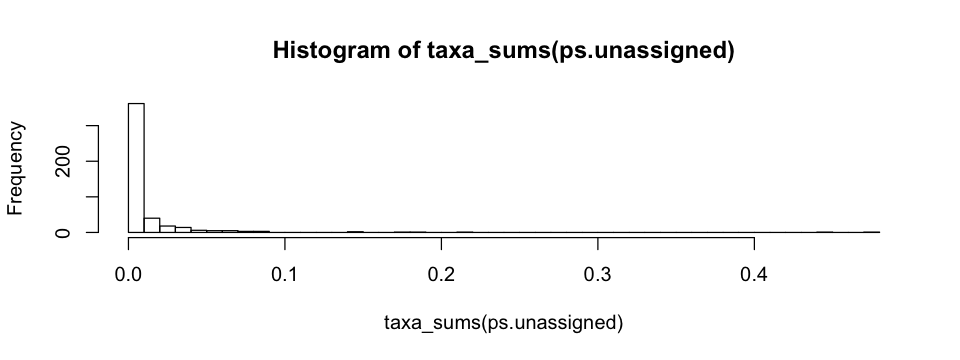

In [286]:
hist(taxa_sums(ps.unassigned),breaks=40)
# This is sort of its average abundance - summing its relabund across all samples.
# We can see the total frequency of the unassigned taxa is mostly low-abundant taxa (across all samples)
# Could use if total abundance is <0.01 across all samples, toss it?

In [289]:
cutoff = 0.01
ps.filtered = subset_taxa(ps, Kingdom!="Unassigned" | taxa_sums(ps.norm)>cutoff)
# Takes the taxa that don't meet the normalized cutoff, but from the full ps file.
ps.filtered
# That cuts about the number we'd want, somewhat conservatively
ps = ps.filtered

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2424 taxa and 218 samples ]
sample_data() Sample Data:       [ 218 samples by 76 sample variables ]
tax_table()   Taxonomy Table:    [ 2424 taxa by 7 taxonomic ranks ]

In [13]:
sample_names(ps)=sample_data(ps)$Correct_ID
# Fixing the ID issue from the Biotech centre

ps.merged = merge_samples(ps, "Sample_ID")
# Merging the in-lab DNA extraction samples
# This sums the OTUs for each sample ID, and averages the sample data
# That's an issue for the non-numeric sample data, so we have to add it back in.
# The code below is probably inefficient, but it works correctly.

names=colnames(sample_data(ps))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps)[ , -which(names(sample_data(ps)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

# Renaming it all
ps=ps.merged

sample_data(ps)$TotalSeqs=sample_sums(ps)
# Adding sample sums
sample_data(ps)[as.numeric(sample_data(ps)$pH)==0 & !is.na(as.numeric(sample_data(ps)$pH)),65]=NA
# Fixing pH 0's
sample_data(ps)[sample_data(ps)$Interval=="No Trees" & !is.na(sample_data(ps)$pH),23]=NA

## Setting up the correct sample data metadata

In [14]:
# Importing the dataset
df = read.csv("../../data/Soils_data/WBNPNWT_Soils_2015_Metadata_File_ITS.txt",sep="\t",header=TRUE, row.names=3)

df=df[,2:(dim(df)[2]-2)]
# Adjust because of weird samplenames from seq centre

Factors = colnames(df)
FactorClass = c("txt","txt","txt","txt","txt","txt","txt","txt","txt","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","txt","txt","txt","num","txt","txt","num","num","txt","txt","txt","txt","txt","num","num","num","num","num","num","num","num","num","num","num","num","txt","num","num","num","num","num","num","num","num","num","num")
FactorSet = c("seq","sample","sample","sample","sample","sample","seq","seq","seq","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","class","class","class","class","class","class","class","class","class","class","class","class","sample","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","codes","codes","codes","codes","codes","codes","codes","codes","codes","codes")
FactorTable = data.frame(Factors=Factors,Class=FactorClass,Set=FactorSet)
# Creating a dataframe with all the factors and whether or not they should be numeric
# And what set of data they belong to

FactorTable = FactorTable[(FactorTable$Factors %in% colnames(sample_data(ps))),]

In [15]:
for (i in colnames(sample_data(ps))[colnames(sample_data(ps)) %in%  FactorTable$Factors ]) {
        if(FactorTable$Class[FactorTable$Factors==i]=="num"){
            sample_data(ps)[,i] = as.numeric(data.frame(sample_data(ps)[,i])[,1])
        }
    }
# No real need to do this for full ps, as won't really be doing stats on raw data

In [16]:
cutoff = 2000

#hist(sample_sums(ps),breaks=20)
# Blanks are very low; can be removed

ps = prune_samples(sample_sums(ps)>=cutoff, ps)
# This results in no blanks remaining.

#ps.norm = transform_sample_counts(ps, function(x) x / sum(x) )
# Transforming the sample counts to relative abundances

ps.norm = transform_sample_counts(ps, function(x) (x / sum(x)))
ps.hell = transform_sample_counts(ps, function(x) (x / sum(x))^0.5)
# Hellinger Transformation: "Particularly suited to species abundance data, 
    # this transformation gives low weights to variables with low counts and many zeros. 
    # The transformation itself comprises dividing each value in a data matrix by its row sum, 
    # and taking the square root of the quotient.   

ps.norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7932 taxa and 100 samples ]
sample_data() Sample Data:       [ 100 samples by 71 sample variables ]

In [18]:
#ps.norm = tax_glom(ps.norm, taxrank="Genus")
ps.hell = transform_sample_counts(ps.norm, function(x) (x^0.5))

### Morels?

In [294]:
Morchella = subset_taxa(ps.norm,Genus=="Morchella")
Morchella

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1 taxa and 100 samples ]
sample_data() Sample Data:       [ 100 samples by 71 sample variables ]
tax_table()   Taxonomy Table:    [ 1 taxa by 7 taxonomic ranks ]

In [295]:
otu_table(Morchella)[sample_sums(Morchella)>0]

sq445       
15S-NT-19O  3.157973e-03
15S-NT-24M  2.264236e-04
15S-NT-28M  1.981844e-03
15S-NT-33O  1.467665e-03
15S-NT-38O  1.488272e-04
15S-NT-39M  5.960897e-05
15S-NT-40M  1.463934e-03
15S-NT-41O  2.523341e-05
15S-NT-48O  4.455020e-03
15S-NT-49O  1.392665e-03
15S-NT-U09O 3.215563e-04
15S-NT-U10O 1.366629e-03
15S-WB-08O  6.440602e-05
15S-WB-10O  4.414361e-04
15S-WB-15M  3.438080e-05
15S-WB-15O  9.852702e-05
15S-WB-16O  2.354049e-04
15S-WB-U01O 1.373417e-03
15S-WB-U04O 2.239642e-04

In [229]:
sample_data(Morchella)[sample_sums(Morchella)>0][,41:50]

Interval Veg_Comm      Land_Class_Unburned Land_Class
15S-NT-19O  Long     Treed Wetland Wetland             Wetland   
15S-NT-24M  Long     Mixedwood     Upland              Upland    
15S-NT-28M  Long     Jack Pine     Upland              Upland    
15S-NT-33O  Long     Black Spruce  Upland              Upland    
15S-NT-38O  Long     Jack Pine     Upland              Upland    
15S-NT-39M  Long     Mixedwood     Upland              Upland    
15S-NT-40M  Long     Mixedwood     Upland              Upland    
15S-NT-41O  Long     Jack Pine     Upland              Upland    
15S-NT-48O  Moderate Treed Wetland Wetland             Wetland   
15S-NT-49O  Moderate Black Spruce  Upland              Upland    
15S-NT-U09O 0.0000   Jack Pine     Unburned            Upland    
15S-NT-U10O 0.0000   Black Spruce  Unburned            Upland    
15S-WB-08O  Long     Mixedwood     Upland              Upland    
15S-WB-10O  Long     Mixedwood     Upland              Upland    
15S-WB-15M  Long     Mixedwood     Upland              Upland    
15S-WB-15O  Long     Mixedwood     Upland              Upland    
15S-WB-16O  Long     Mixedwood     Upland              Upland    
15S-WB-U01O 0.0000   Mixedwood     Unburned            Upland    
15S-WB-U04O 0.0000   Jack Pine     Unburned            Upland    
            Burned_Unburned Understory_CBI Overstory_CBI CBI RBR
15S-NT-19O  Burned          27             27            29  46 
15S-NT-24M  Burned           2              2             2   5 
15S-NT-28M  Burned          45             24            44  44 
15S-NT-33O  Burned          33             28            37  53 
15S-NT-38O  Burned          30             17            24  31 
15S-NT-39M  Burned          12             10            10   9 
15S-NT-40M  Burned          24              9            20  12 
15S-NT-41O  Burned          16             11            16  20 
15S-NT-48O  Burned          19             28            25  36 
15S-NT-49O  Burned          22             28            26  49 
15S-NT-U09O Unburned         1              1             1  43 
15S-NT-U10O Unburned         1              1             1   4 
15S-WB-08O  Burned          15             12            14  17 
15S-WB-10O  Burned          18             22            23  28 
15S-WB-15M  Burned          24              8            18  11 
15S-WB-15O  Burned          24              8            18  11 
15S-WB-16O  Burned          35             23            35  39 
15S-WB-U01O Unburned         1              1             1  32 
15S-WB-U04O Unburned         1              1             1  22 
            Pct_Exposed_Mineral
15S-NT-19O   8                 
15S-NT-24M   1                 
15S-NT-28M  18                 
15S-NT-33O  22                 
15S-NT-38O   7                 
15S-NT-39M  13                 
15S-NT-40M   3                 
15S-NT-41O   1                 
15S-NT-48O   1                 
15S-NT-49O   4                 
15S-NT-U09O  1                 
15S-NT-U10O  1                 
15S-WB-08O  23                 
15S-WB-10O   2                 
15S-WB-15M   1                 
15S-WB-15O   1                 
15S-WB-16O  27                 
15S-WB-U01O  1                 
15S-WB-U04O  1

## Dendrogram

In [356]:
colnames(sample_data(ps.norm))

[1] "Barcodes"            "Sample_ID"           "Site_ID"            
 [4] "Org_or_Min"          "Exch_Na_mg_kg"       "Exch_Mg_mg_kg"      
 [7] "Exch_K_mg_kg"        "Exch_Ca_mg_kg"       "pH"                 
[10] "EC_mS_cm"            "CEC_cmol_kg"         "Total_N_pct"        
[13] "Total_S_pct"         "Sand_pct"            "Clay_pct"           
[16] "Silt_pct"            "Ca_mg_kg"            "K_mg_kg"            
[19] "Mg_mg_kg"            "Na_mg_kg"            "P_mg_kg"            
[22] "S_mg_kg"             "Al_mg_kg"            "Fe_mg_kg"           
[25] "Zn_mg_kg"            "Cu_mg_kg"            "Mn_mg_kg"           
[28] "Mo_mg_kg"            "TIC_ash_pct"         "TOC_LOI_pct"        
[31] "TOC_HCL_cruc_pct"    "TC_pct"              "Fire_ID"            
[34] "Ecosite"             "Moisture"            "Moisture_Regime"    
[37] "Nutrient"            "Community"           "Forest"             
[40] "Plains"              "Interval"            "Veg_Comm"           
[43] "Land_Class_Unburned" "Land_Class"          "Burned_Unburned"    
[46] "Understory_CBI"      "Overstory_CBI"       "CBI"                
[49] "RBR"                 "Pct_Exposed_Mineral" "CFSI"               
[52] "Burn_Severity_Index" "Mean_Duff_Depth_cm"  "O_Depth_cm"         
[55] "Dead_Trees"          "Live_Trees"          "nTrees"             
[58] "Severity_Class"      "temp"                "rh"                 
[61] "ws"                  "prec"                "ffmc"               
[64] "dmc"                 "dc"                  "isi"                
[67] "bui"                 "fwi"                 "Correct_ID"         
[70] "X"                   "TotalSeqs"

In [357]:
ps.dist = subset_samples(ps.norm,Veg_Comm=="Jack Pine")
dist=distance(ps.dist,method="bray")
clust.res = hclust(dist, method="single")
#  "ward", "single", "complete", "average", "mcquitty", "median" or "centroid"

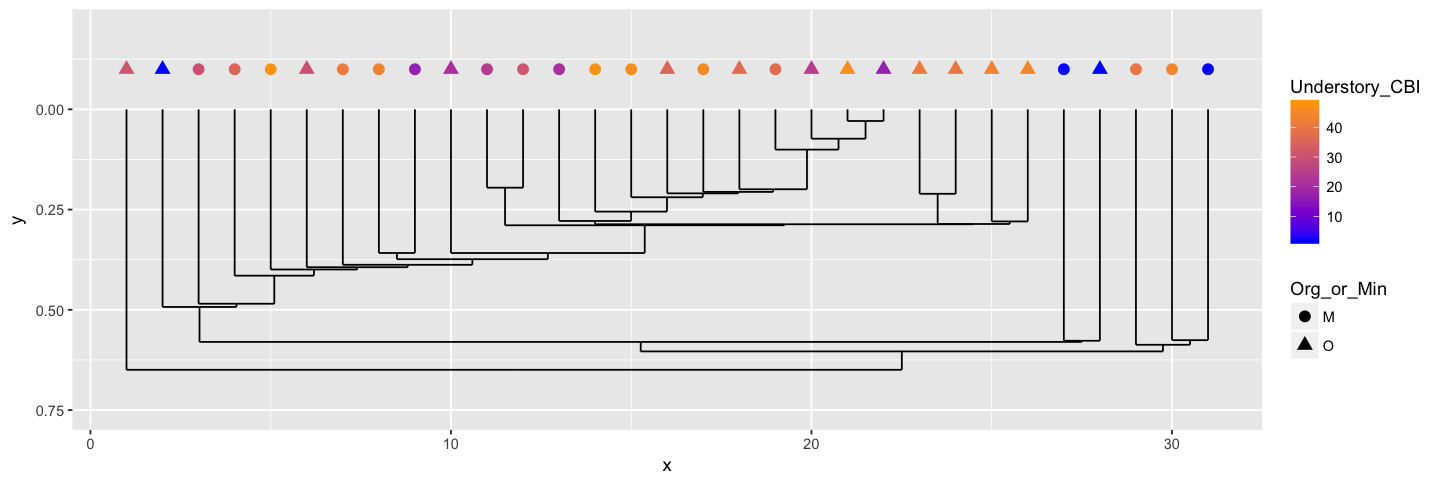

In [358]:
options(repr.plot.width=12, repr.plot.height=4)
dhc = as.dendrogram(clust.res)
# Rectangular lines
ddata = dendro_data(dhc, type = "rectangle")
ddata$properties = ddata$labels
colnames(ddata$properties) = c("x","y","Sample_ID")
ddata$properties = data.frame(join(ddata$properties,data.frame(sample_data(ps.dist)),by="Sample_ID"))
ddata2=ddata

p = ggplot(segment(ddata)) + 
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend)) + 
  #coord_flip() + 
  scale_y_reverse(expand = c(0.2, 0))
#p = p + geom_text(data = ddata$labels, aes(x = x, y = y, label = label), size = 3, hjust = -0.2)
#p = p + geom_point(data = ddata2$properties, aes(x = x, y = y, color=CBI), size = 3)
p = p + geom_point(data = ddata$properties, aes(x = x, y = y-0.1, color=Understory_CBI, shape=Org_or_Min), size = 3)
#p = p + geom_point(data = ddata$properties, aes(x = x, y = y, color=CFSI), size = 3)
#p = p + geom_point(data = ddata$properties, aes(x = x, y = y, color=Severity_Class), size = 3)
p = p + scale_color_gradient(low="blue",high="orange")
p 

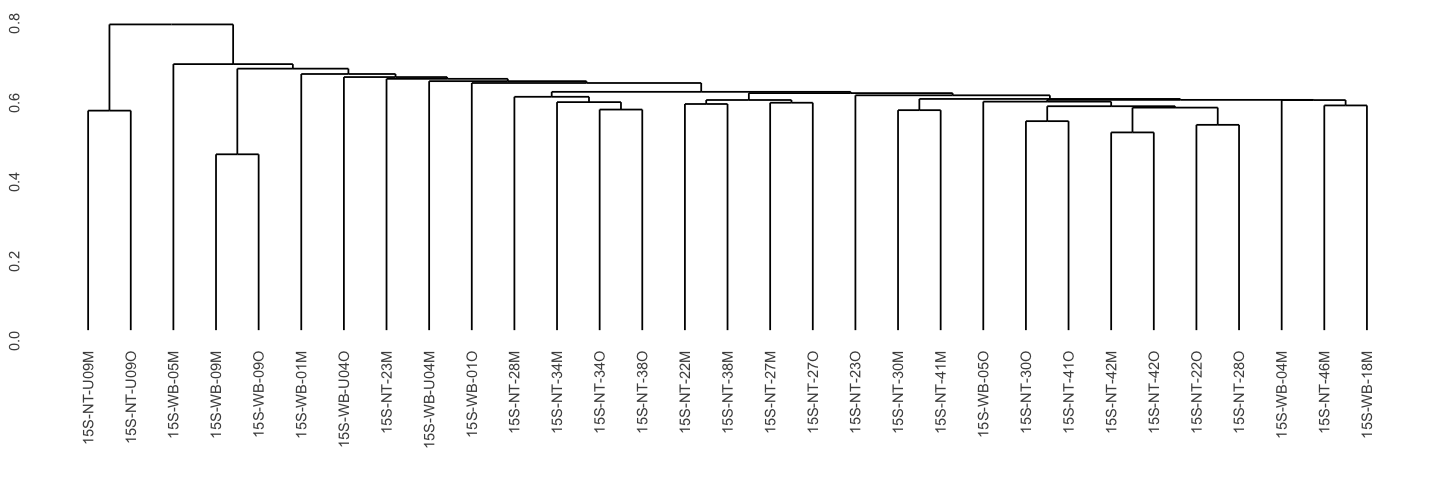

In [39]:
options(repr.plot.width=12, repr.plot.height=4)
p = ggdendrogram(clust.res, rotate = FALSE, size = 3)
p

## Ordinations

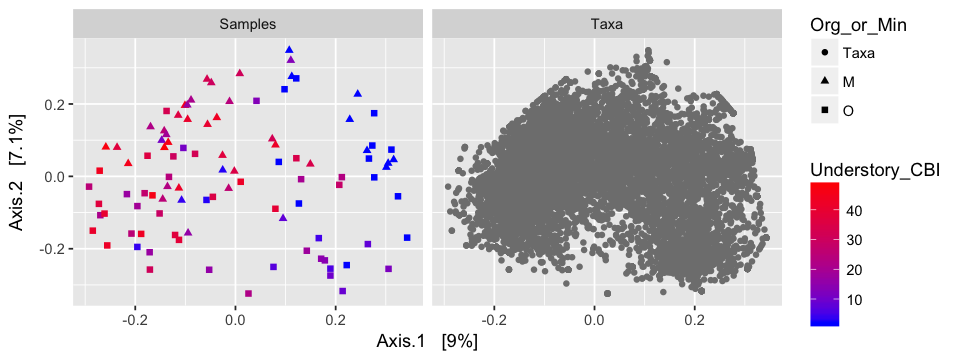

In [21]:
options(repr.plot.width=8, repr.plot.height=3)

ord.cca = ordinate(ps.hell, method = "PCoA")
p = plot_ordination(ps.hell, ord.cca, type="split", color="Understory_CBI", shape="Org_or_Min") 
p = p + scale_color_gradient(low="blue",high="red") 
p

In [22]:
# ps.norm.glom = transform_sample_counts(ps.norm.glom, function(x) x / sum(x) )
ord = ordinate(ps.hell, method = "NMDS", distance = "bray", k=3, trymax=1000)

Run 0 stress 0.1428855 
Run 1 stress 0.1428901 
... Procrustes: rmse 0.003026473  max resid 0.02166157 
Run 2 stress 0.142894 
... Procrustes: rmse 0.000979316  max resid 0.006224065 
... Similar to previous best
Run 3 stress 0.1429084 
... Procrustes: rmse 0.002792111  max resid 0.02457178 
Run 4 stress 0.1441562 
Run 5 stress 0.1450734 
Run 6 stress 0.1450949 
Run 7 stress 0.1441501 
Run 8 stress 0.1450769 
Run 9 stress 0.1428956 
... Procrustes: rmse 0.003435446  max resid 0.02594027 
Run 10 stress 0.1465388 
Run 11 stress 0.1428737 
... New best solution
... Procrustes: rmse 0.001845535  max resid 0.01285172 
Run 12 stress 0.1450717 
Run 13 stress 0.1428744 
... Procrustes: rmse 0.0008591097  max resid 0.005510774 
... Similar to previous best
Run 14 stress 0.1428859 
... Procrustes: rmse 0.001943783  max resid 0.01343158 
Run 15 stress 0.1441459 
Run 16 stress 0.1428738 
... Procrustes: rmse 0.0001172863  max resid 0.0006338898 
... Similar to previous best
Run 17 stress 0.1429124

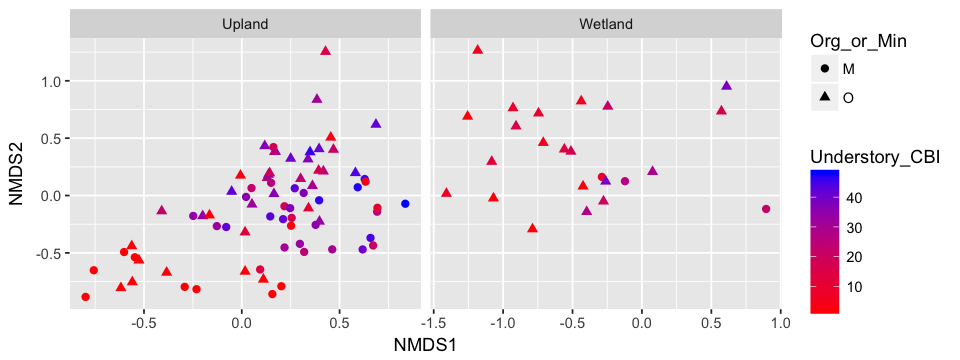

In [25]:
options(repr.plot.width=8, repr.plot.height=3)

#sample_data(ps.plot)$Org_or_Min=droplevels(sample_data(ps.plot)$Org_or_Min)
p = plot_ordination(ps.hell, ord, color = "Understory_CBI",shape="Org_or_Min", axes=c(1,2))

p = p  + geom_point(size=2) + facet_grid(~Land_Class, scales="free")  + scale_color_gradient(low="red",high="blue") 
p

## Looking at only uplands

In [26]:
ps.up = subset_samples(ps.hell, c(Land_Class=="Upland"))

ps.up

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7932 taxa and 76 samples ]
sample_data() Sample Data:       [ 76 samples by 71 sample variables ]

In [27]:
ord = ordinate(ps.up, method = "NMDS", distance = "bray", k=3, trymax=1000)
# 0.128 for Hellinger; Similar for no Hellinger.

Run 0 stress 0.1462375 
Run 1 stress 0.1462344 
... New best solution
... Procrustes: rmse 0.0008024168  max resid 0.004220756 
... Similar to previous best
Run 2 stress 0.1468621 
Run 3 stress 0.1471797 
Run 4 stress 0.1465766 
... Procrustes: rmse 0.0154539  max resid 0.0611235 
Run 5 stress 0.1462376 
... Procrustes: rmse 0.0008287049  max resid 0.00435579 
... Similar to previous best
Run 6 stress 0.146574 
... Procrustes: rmse 0.01523822  max resid 0.06084247 
Run 7 stress 0.1462381 
... Procrustes: rmse 0.0009727484  max resid 0.005766034 
... Similar to previous best
Run 8 stress 0.1466 
... Procrustes: rmse 0.01400965  max resid 0.05863714 
Run 9 stress 0.1462355 
... Procrustes: rmse 0.0005940514  max resid 0.002887949 
... Similar to previous best
Run 10 stress 0.1470858 
Run 11 stress 0.1462375 
... Procrustes: rmse 0.0008260339  max resid 0.004001159 
... Similar to previous best
Run 12 stress 0.1462347 
... Procrustes: rmse 0.0002090342  max resid 0.0006436081 
... Similar

In [28]:
#ord = ordinate(ps.norm, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=1000)
NMDS.coords = data.frame(ord$points)
# Extracting the coordinates from the ordination
NMDS.coords = merge(NMDS.coords,sample_data(ps.norm), by = 0)
# Merging it with the sample data, by rowname (the same)
NMDS.coords = NMDS.coords #%>%
    #filter(Land_Class=="Upland" | Land_Class=="Unburned")#%>%
    #filter(Org_or_Min=="O")
plot_ly(NMDS.coords, x = NMDS.coords$MDS1, y = NMDS.coords$MDS2, z = NMDS.coords$MDS3, color = ~NMDS.coords$Interval
        , symbol = NMDS.coords$Org_or_Min, symbols = c(1,3,5)
       )%>%
    layout(scene = list(xaxis = list(title = "NMDS1"), yaxis = list(title = "NMDS2"),
          zaxis = list(title = "NMDS3")))

No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#scatter3d
No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plot.ly/r/reference/#scatter-mode
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [379]:
#Sys.setenv("plotly_username"="TheaWhitman")
#Sys.setenv("plotly_api_key"="dJ71gYtACcvUICDcTpb6")
#plotly_POST(x = last_plot(), filename = "WB2015-ITS.3D", fileopt = "overwrite", sharing = "public")

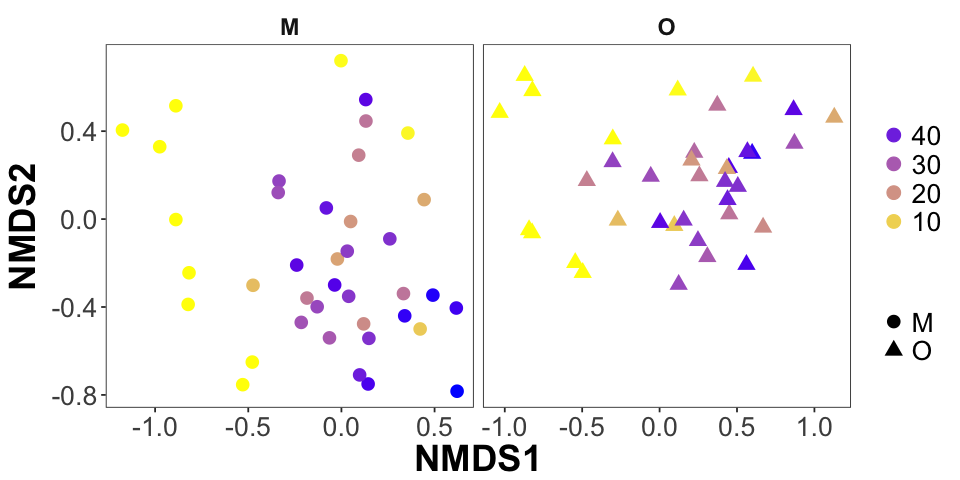

In [31]:
options(repr.plot.width=8, repr.plot.height=4)

p = plot_ordination(ps.up, ord
                    ,color = "Understory_CBI", shape="Org_or_Min"
                    ,axes=c(1,2)
                   )

p = p  + facet_grid(~Org_or_Min, scales="free") 
#p = p + scale_color_gradient(low="red",high="blue")
p = p  + geom_point(size=3.5) + scale_colour_gradient(low="yellow",high="blue")

p = p + guides(colour = guide_legend("", reverse=TRUE), shape = guide_legend(""))

p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

p

## Checking lab reps

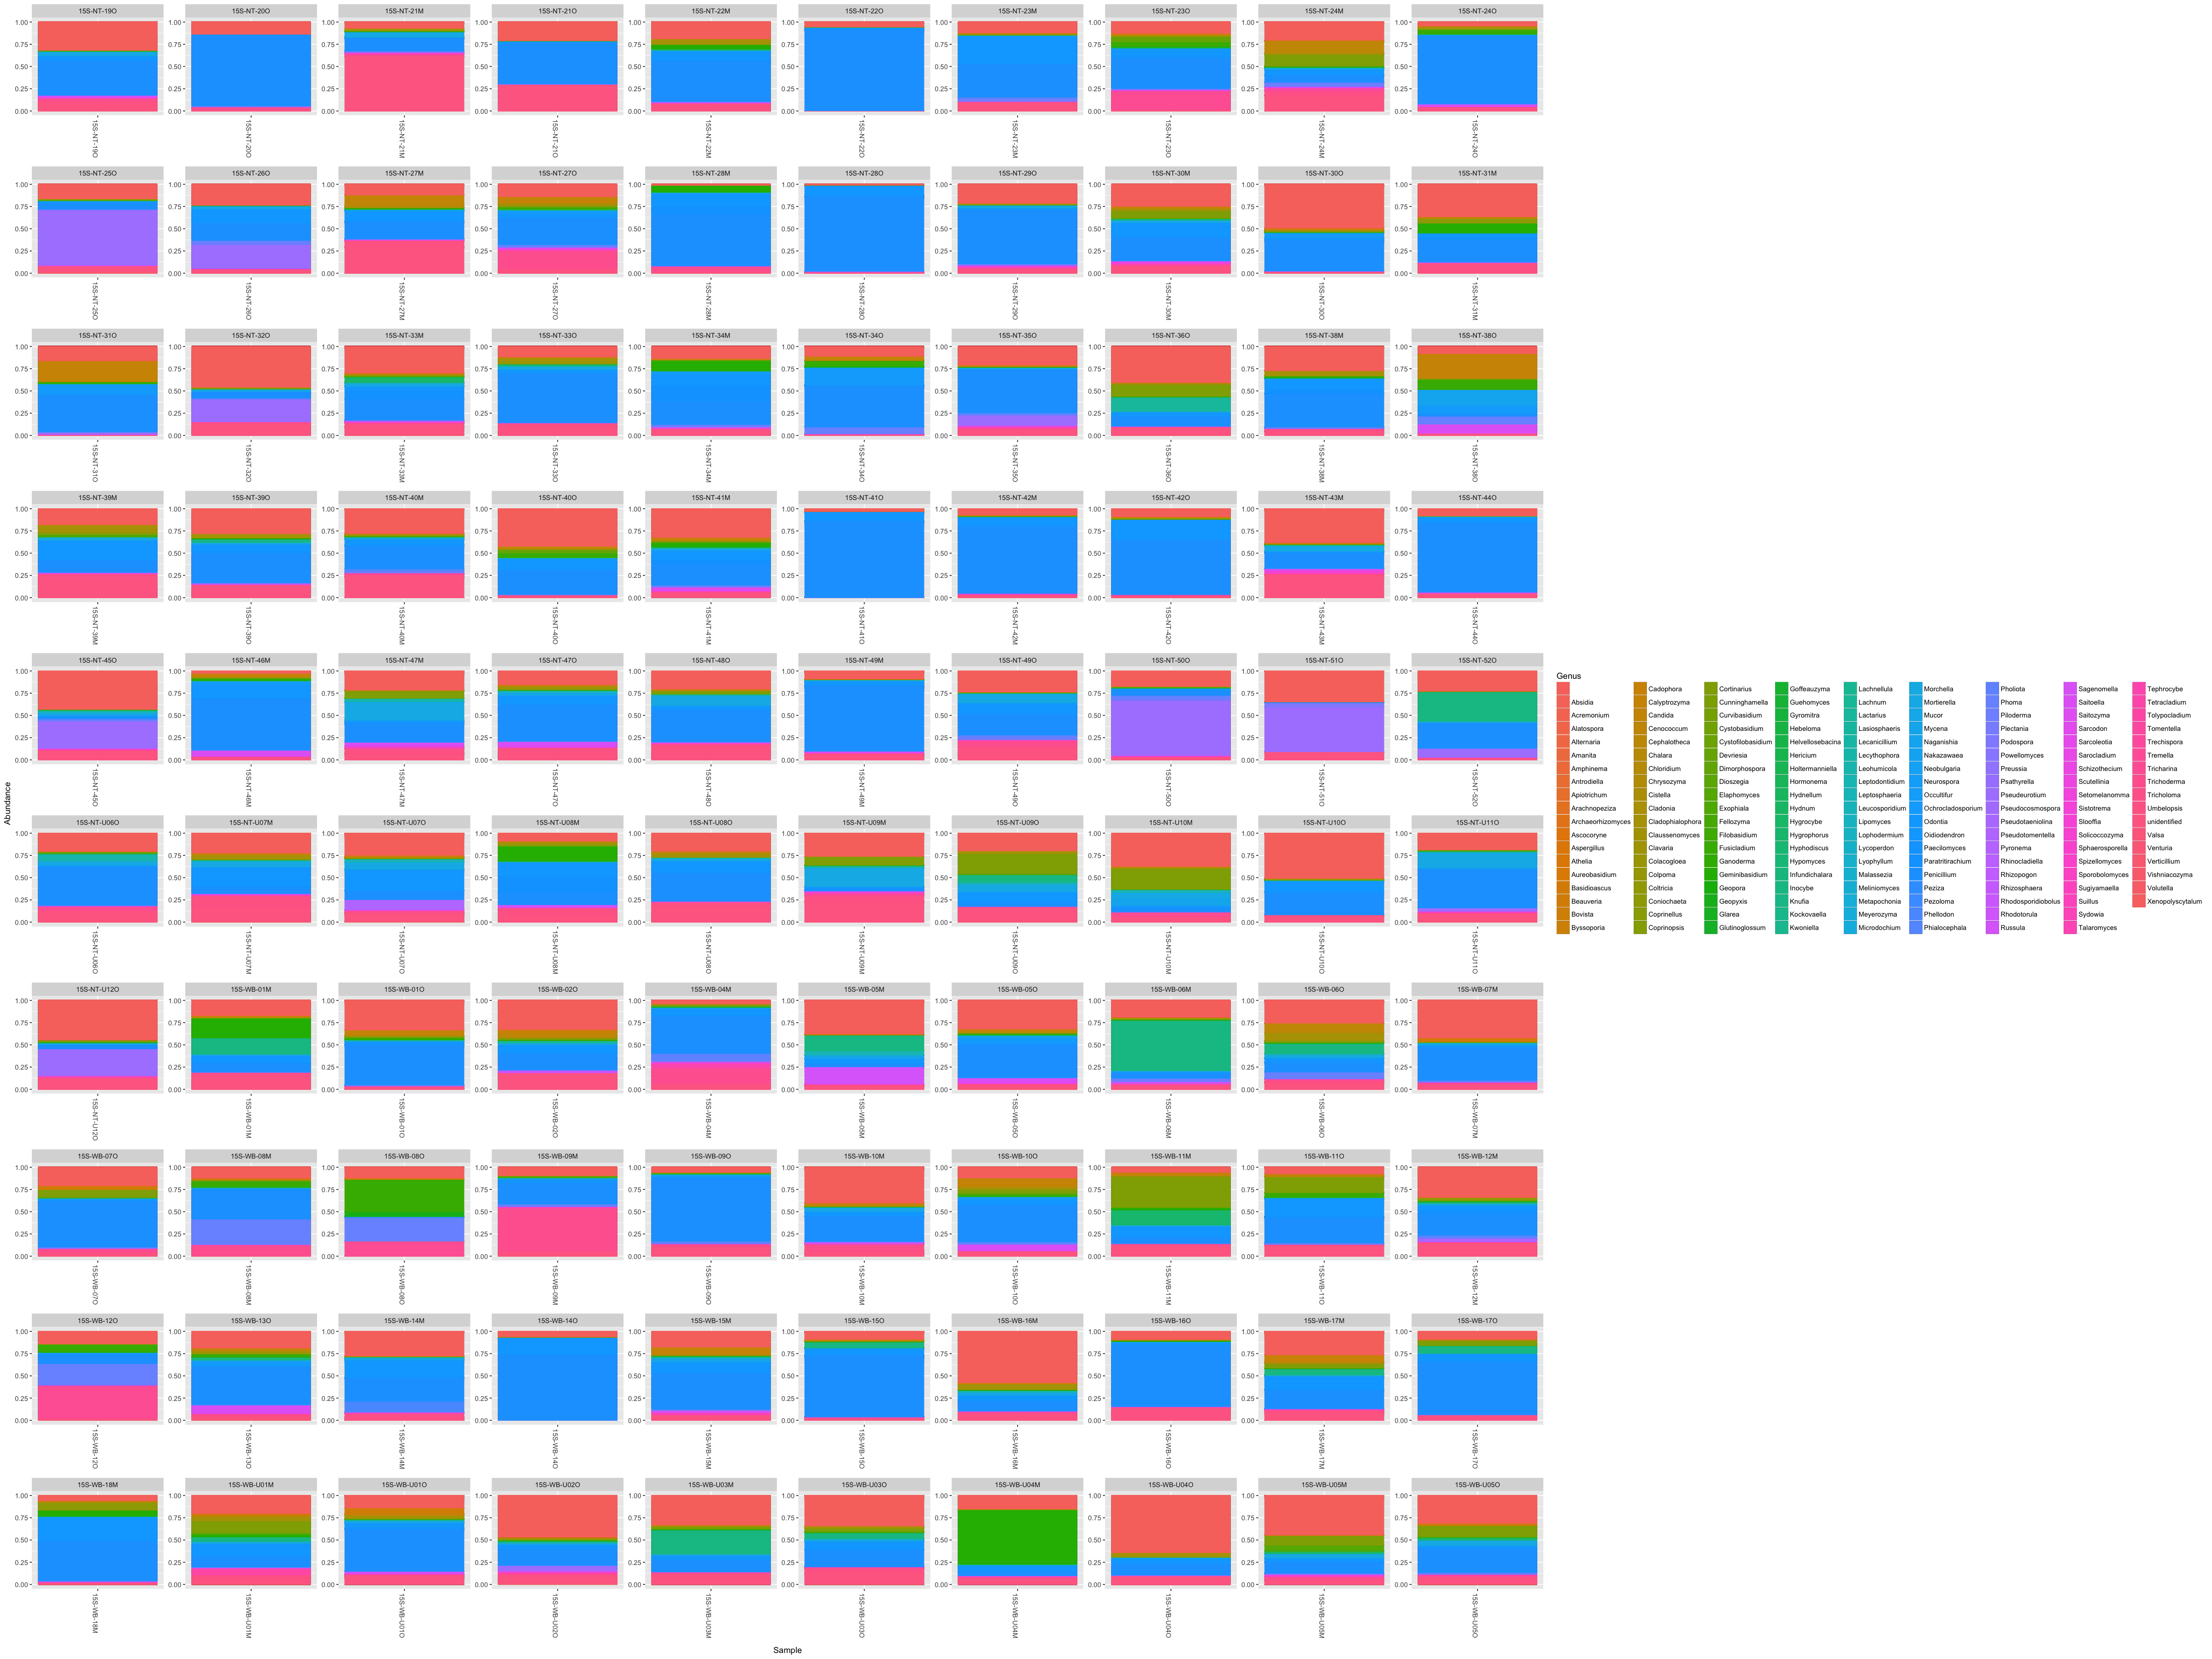

In [327]:
options(repr.plot.width=40, repr.plot.height=30)
#plot_bar(ps, fill="Phylum")
p = plot_bar(ps.norm, fill="Genus") + facet_wrap(~Sample_ID, scales="free") + geom_bar(aes(color=Genus, fill=Genus), stat="identity", position="stack")
p
# This looks good, actually. The lab-DNA extraction reps match up well. So, we merge these samples for most analyses.

## Checking Org vs Min same site

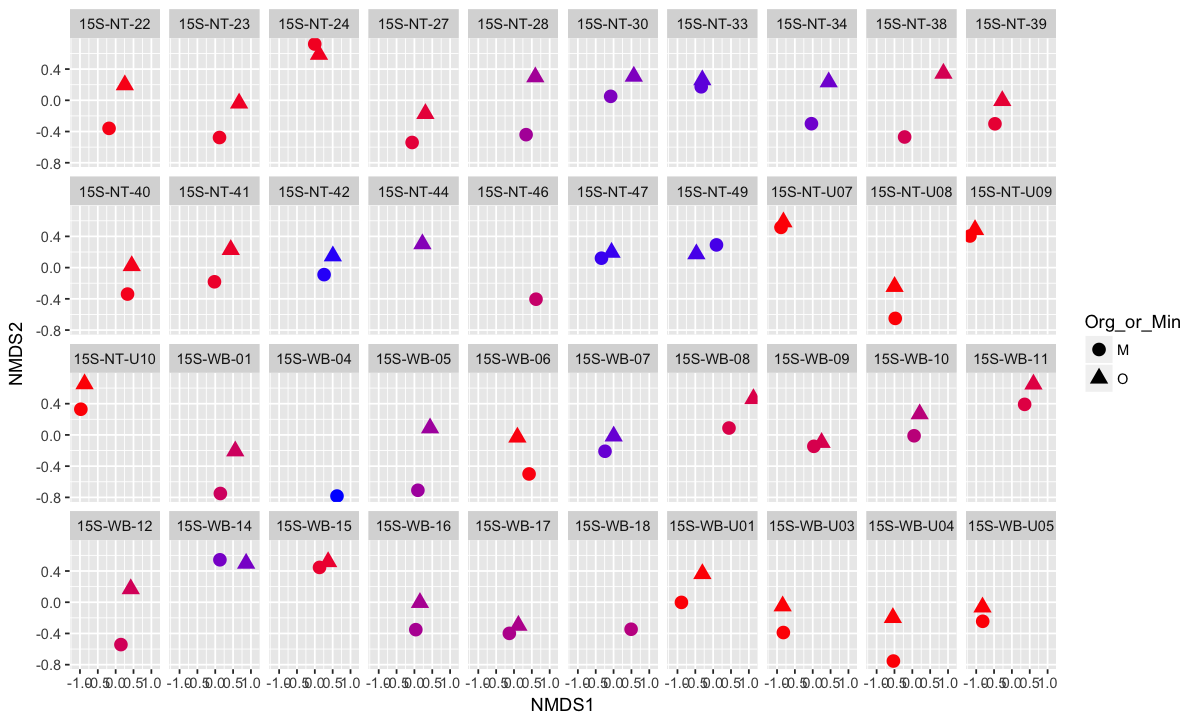

In [32]:
options(repr.plot.width=10, repr.plot.height=6)
p = plot_ordination(ps.norm, ord, color = "CFSI", shape="Org_or_Min")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + facet_wrap(~Site_ID, ncol=10) + scale_color_gradient(low="red",high="blue") + guides(color=FALSE)
p

# Do seem somewhat related, but certainly distinct.

## Checking barcode bias

In [49]:
mdf = psmelt(ps)

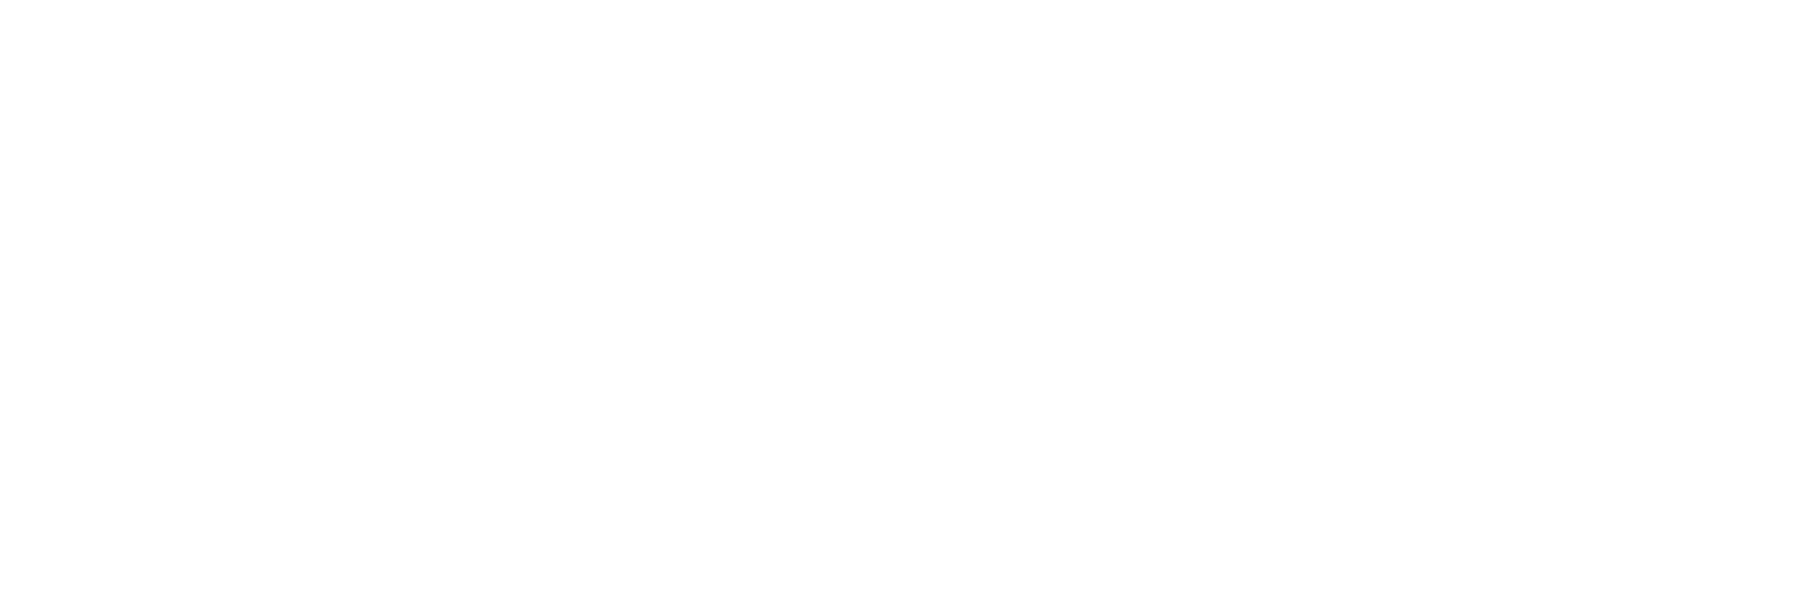

In [51]:
options(repr.plot.width=15, repr.plot.height=5)
p = ggplot(mdf,aes(x=Rev_Primer_Barcode, y=TotalSeqs))
p = p + geom_point()
p
# No clear evidence of bias against one barcode

## Relative abundances

In [230]:
length(levels(factor(tax_table(ps.norm)[, "Genus"])))

[1] 169

In [232]:
ps.norm.glom = tax_glom(ps.norm, taxrank=rank_names(ps.norm)[5], NArm=TRUE, bad_empty=c(NA, "", " ", "\t"))

In [233]:

# Create a factor corresponding to the Genera
genfac = factor(tax_table(ps.norm.glom)[, "Family"])

# Tabulate the counts for each genera in each sample
gentab = apply(otu_table(ps.norm.glom), MARGIN = 1, function(x) {tapply(x, INDEX = genfac, FUN = sum, na.rm = TRUE, simplify = TRUE)})

observationThreshold = 0
GenSum = apply(gentab > observationThreshold, 2, sum)
OTUSum = GenSum = apply(otu_table(ps.norm.glom) > observationThreshold, 1, sum)
GenSum
# The number of OTUs or genera in each sample

15S-NT-19O  15S-NT-20O  15S-NT-21M  15S-NT-21O  15S-NT-22M  15S-NT-22O 
         72          32          47          33          63          35 
 15S-NT-23M  15S-NT-23O  15S-NT-24M  15S-NT-24O  15S-NT-25O  15S-NT-26O 
         58          59          79          60          50          56 
 15S-NT-27M  15S-NT-27O  15S-NT-28M  15S-NT-28O  15S-NT-29O  15S-NT-30M 
         60          69          44          17          56          76 
 15S-NT-30O  15S-NT-31M  15S-NT-31O  15S-NT-32O  15S-NT-33M  15S-NT-33O 
         60          52          59          52          79          85 
 15S-NT-34M  15S-NT-34O  15S-NT-35O  15S-NT-36O  15S-NT-38M  15S-NT-38O 
         54          40          64          49          52          49 
 15S-NT-39M  15S-NT-39O  15S-NT-40M  15S-NT-40O  15S-NT-41M  15S-NT-41O 
         69          65          62          62          68          39 
 15S-NT-42M  15S-NT-42O  15S-NT-43M  15S-NT-44O  15S-NT-45O  15S-NT-46M 
         62          39          68          40          71          42 
 15S-NT-47M  15S-NT-47O  15S-NT-48O  15S-NT-49M  15S-NT-49O  15S-NT-50O 
         69          79          94          66          68          36 
 15S-NT-51O  15S-NT-52O 15S-NT-U06O 15S-NT-U07M 15S-NT-U07O 15S-NT-U08M 
         26          49          72          77          69          59 
15S-NT-U08O 15S-NT-U09M 15S-NT-U09O 15S-NT-U10M 15S-NT-U10O 15S-NT-U11O 
         63          59          65          59          58          63 
15S-NT-U12O  15S-WB-01M  15S-WB-01O  15S-WB-02O  15S-WB-04M  15S-WB-05M 
         40          76          62          72          44          73 
 15S-WB-05O  15S-WB-06M  15S-WB-06O  15S-WB-07M  15S-WB-07O  15S-WB-08M 
         57          67          74          68          59          46 
 15S-WB-08O  15S-WB-09M  15S-WB-09O  15S-WB-10M  15S-WB-10O  15S-WB-11M 
         33          65          52          75          71          65 
 15S-WB-11O  15S-WB-12M  15S-WB-12O  15S-WB-13O  15S-WB-14M  15S-WB-14O 
         68          54          47          67          58          33 
 15S-WB-15M  15S-WB-15O  15S-WB-16M  15S-WB-16O  15S-WB-17M  15S-WB-17O 
         85          55          71          54          75          59 
 15S-WB-18M 15S-WB-U01M 15S-WB-U01O 15S-WB-U02O 15S-WB-U03M 15S-WB-U03O 
         54          60          83          95          63          63 
15S-WB-U04M 15S-WB-U04O 15S-WB-U05M 15S-WB-U05O 
         52          58          58          57

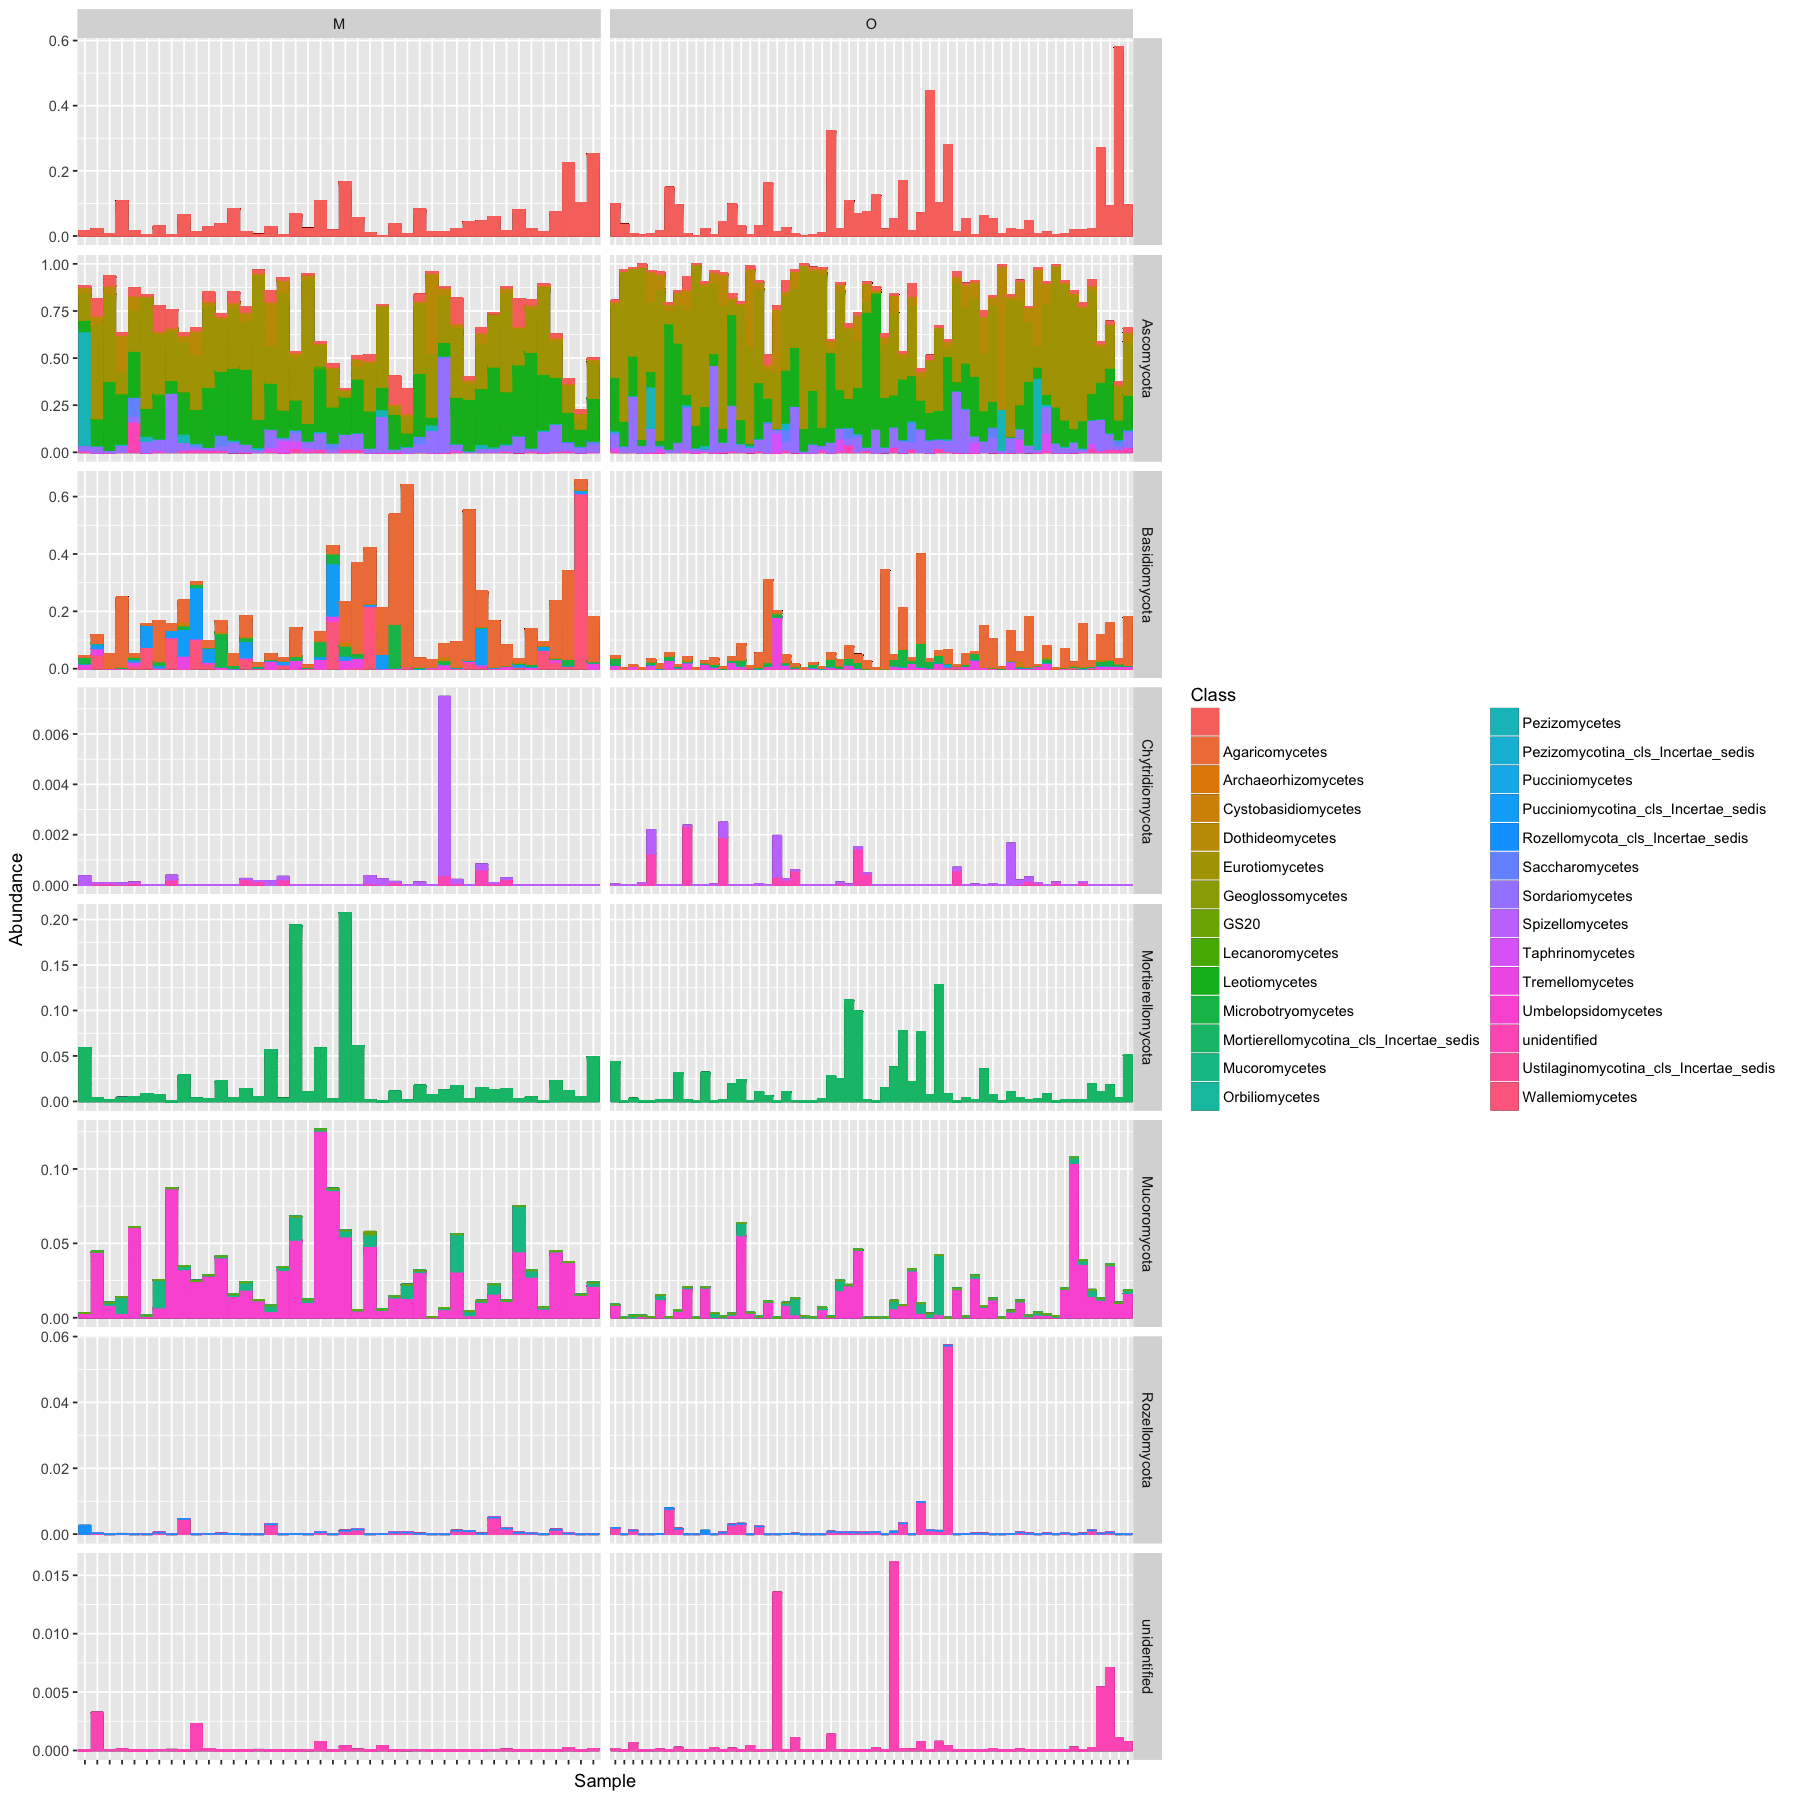

In [235]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_bar(ps.norm, fill="Class") + geom_bar(aes(color=Class, fill=Class), stat="identity", position="stack") + theme(axis.text.x=element_blank()) + facet_grid(~Phylum~Org_or_Min,scales="free")
p
# This actually looks broadly similar to the first-round Dada2 results, unpooled. So that's good.

In [236]:
mdf = psmelt(ps.norm)

In [237]:
df = mdf %>%
    group_by(Sample,Genus)%>%
    mutate(Relabund=sum(Abundance))

cutoff=0.005

CommonPhyla = df %>%
    group_by(Genus)%>%
    summarize(MeanRelabund=mean(Relabund), MaxRelabund = max(Relabund))%>%
    filter(MeanRelabund>cutoff | MaxRelabund>cutoff)

print(c(paste(dim(CommonPhyla)[1],"most abundant genera")))

CommonPhyla = as.matrix(CommonPhyla)[,1]

df = df %>%
    filter(Genus %in% CommonPhyla)%>%
    filter(Org_or_Min != "B")

[1] "106 most abundant genera"


In [238]:
df = mdf %>%
    group_by(Sample,Genus)%>%
    mutate(Relabund=sum(Abundance))

cutoff=0.05

CommonTax = df %>%
    group_by(Genus)%>%
    summarize(MeanRelabund=mean(Relabund), MaxRelabund = max(Relabund))%>%
    filter(MeanRelabund>cutoff | MaxRelabund>cutoff)

print(c(paste(dim(CommonTax)[1],"most abundant taxa")))

CommonTax = as.matrix(CommonTax)[,1]

df = df %>%
    group_by(Sample)%>%
    filter(Genus %in% CommonTax)

[1] "39 most abundant taxa"


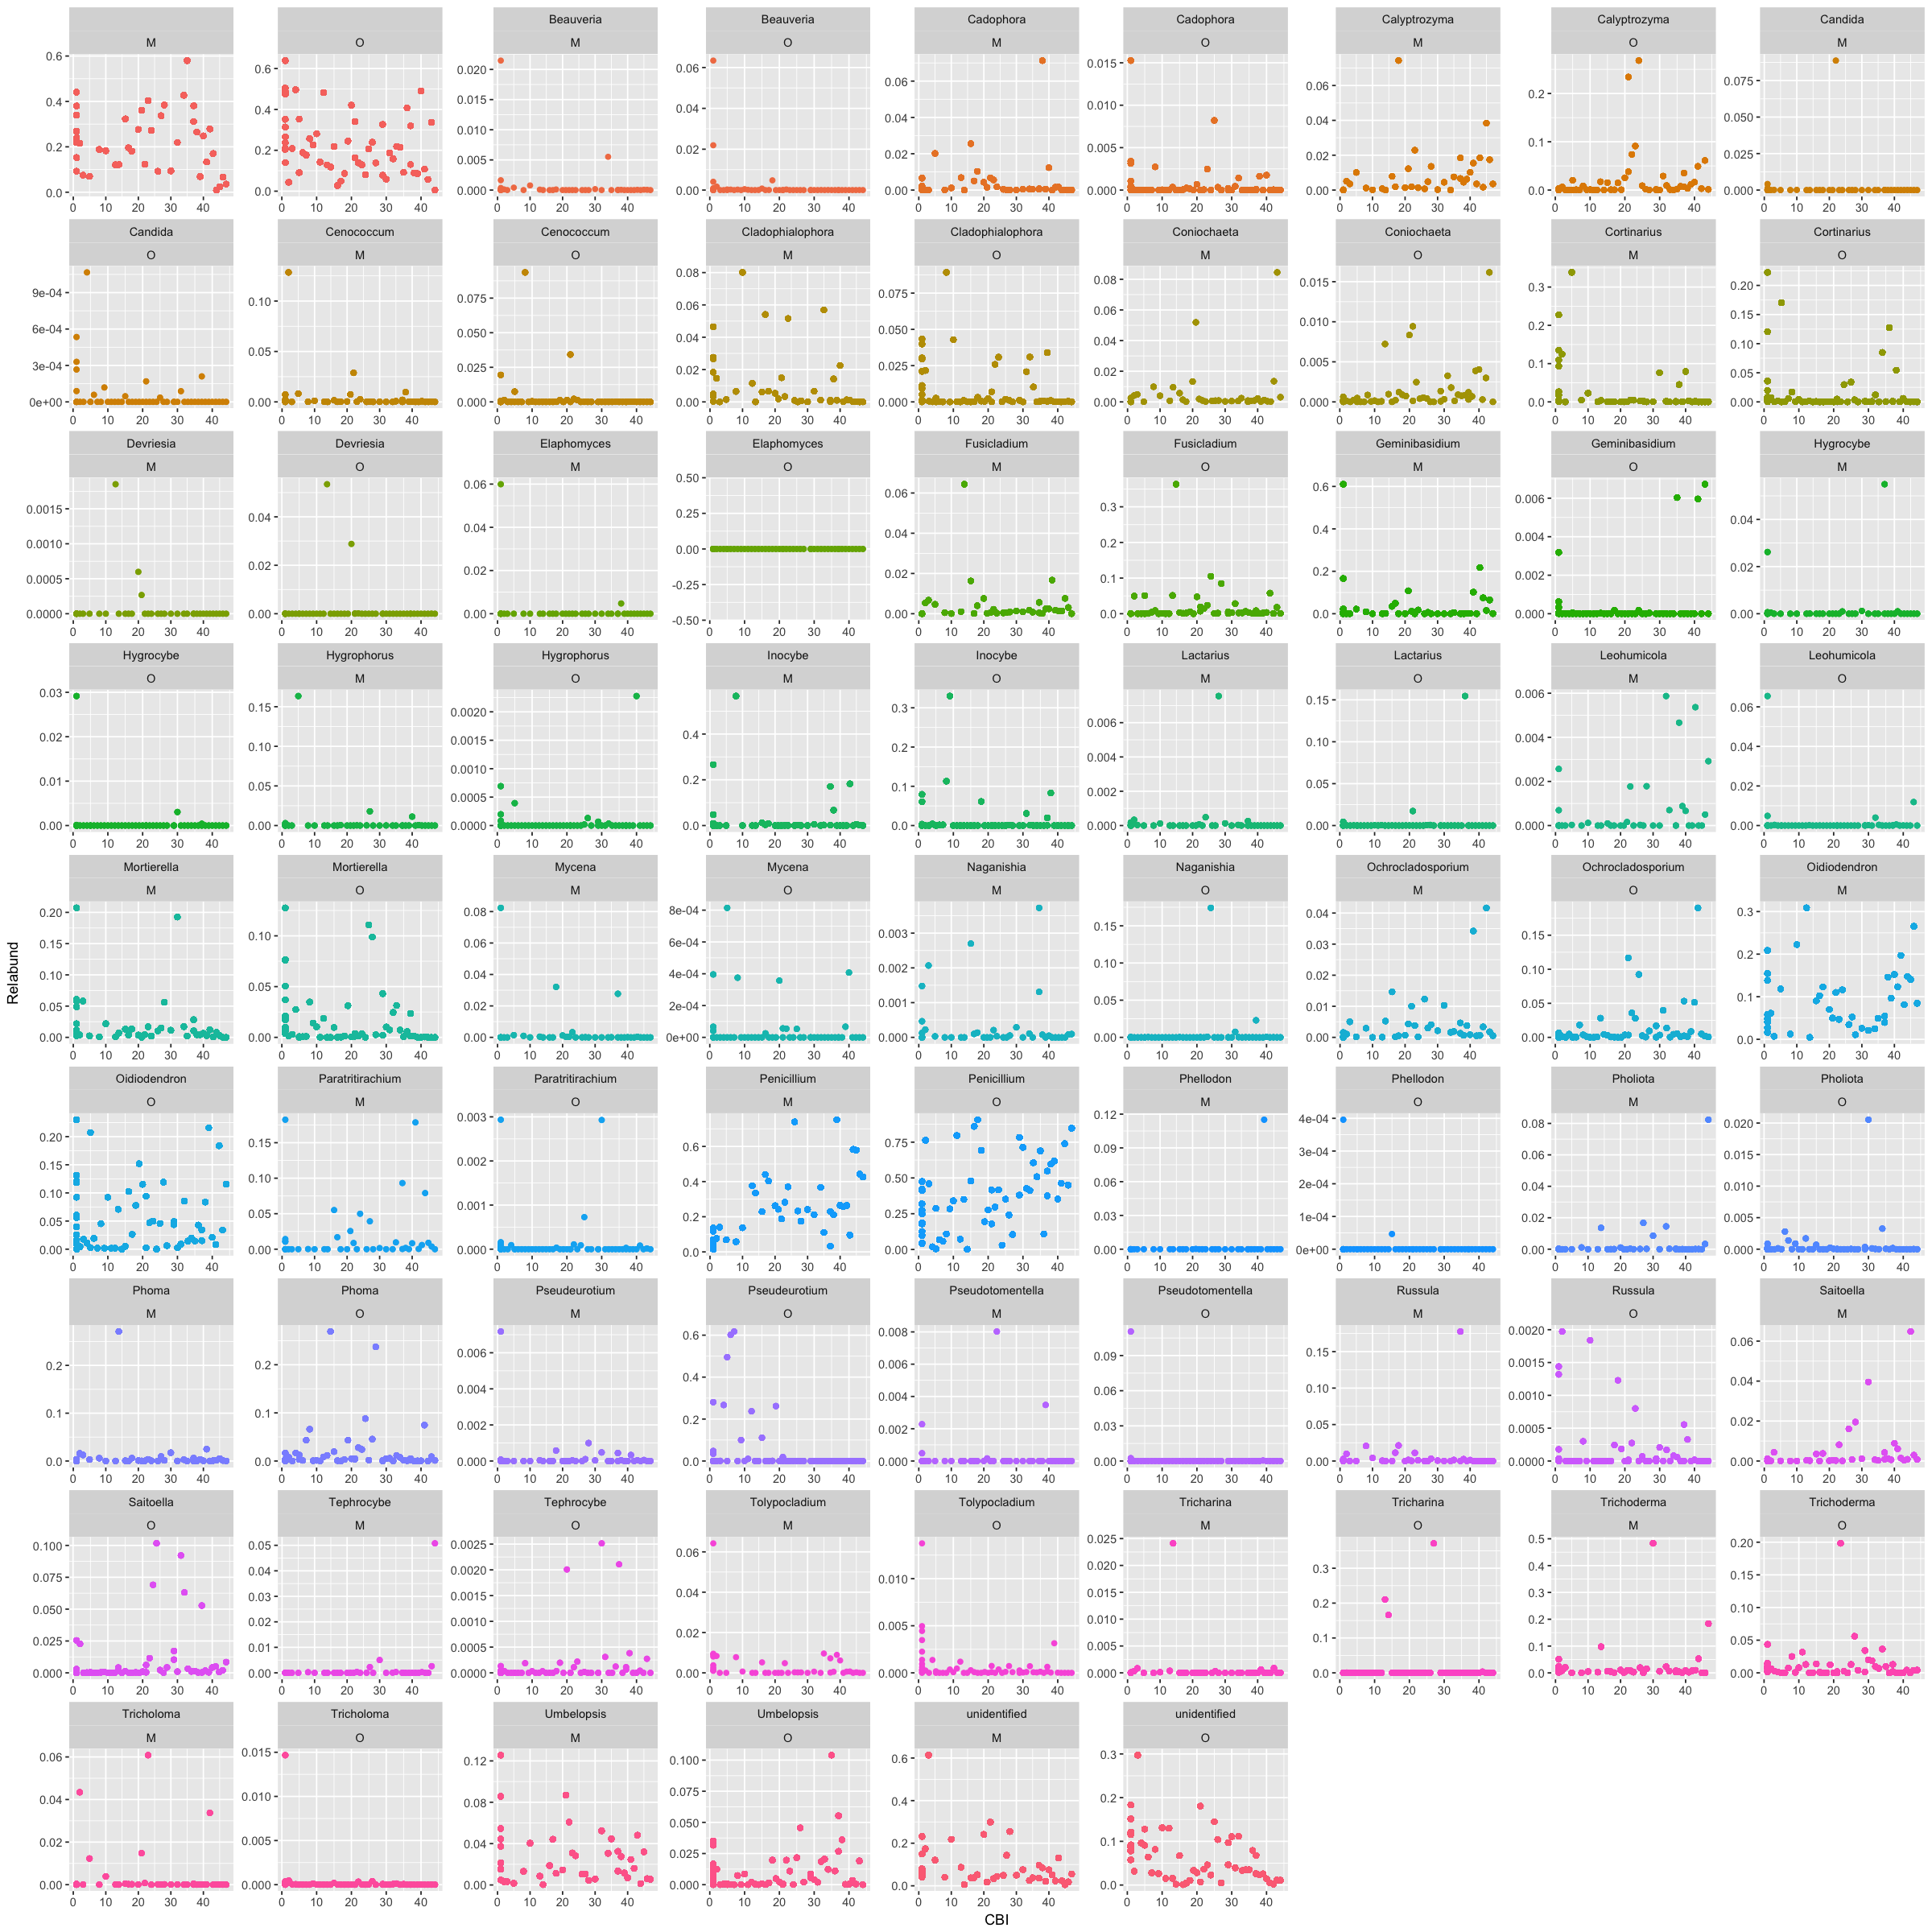

In [239]:
options(repr.plot.width=20, repr.plot.height=20)
p = ggplot(df)
p = p + geom_point(aes(x=CBI, y=Relabund, color=Genus)) + facet_wrap(~Genus+Org_or_Min, scales="free")
p = p + guides(color=FALSE)
p

In [361]:
d.Pen=df[df$Genus=="Penicillium",]

In [362]:
d.Pen=d.Pen[!is.na(d.Pen$OTU),]

In [363]:
dim(d.Pen)

[1] 2772   83

In [364]:
cutoff=0.3

CommonTax = d.Pen %>%
    group_by(OTU)%>%
    summarize(MeanRelabund=mean(Abundance), MaxRelabund = max(Abundance))%>%
    filter(MeanRelabund>cutoff | MaxRelabund>cutoff)


print(c(paste(dim(CommonTax)[1],"most abundant taxa")))

CommonTax = as.matrix(CommonTax)[,1]

d.Pen = d.Pen %>%
    filter(OTU %in% CommonTax)

dim(d.Pen)

[1] "8 most abundant taxa"


[1] 792  83

In [365]:
levels(as.factor(d.Pen$OTU))

[1] "122586d6844f67237ea5cf8da21d9962" "6d4eca68762c9055c0f01926c6c6603d"
[3] "7e98c055240959ee9ae58d8b56faba92" "89cd99e609a39f0c7f5113bde099d133"
[5] "95c2bc67eacd85bbca54967d19d7a339" "a0299a0a79e59eede92dd2280c3c7e82"
[7] "c295356000b4a266483dc6d03c656913" "f3d55a0d0216af104ad69f7824874e4c"

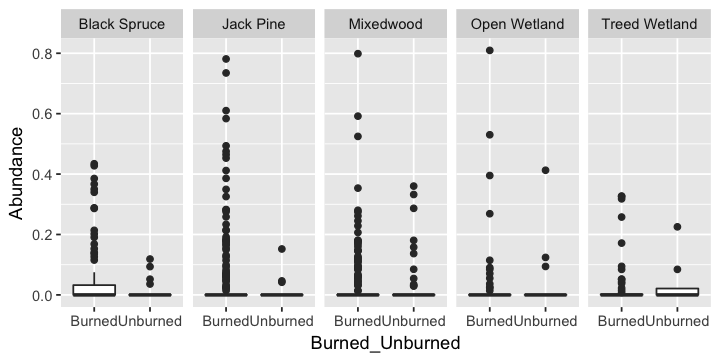

In [377]:
options(repr.plot.width=6, repr.plot.height=3)

p = ggplot(d.Pen)
#p = p + geom_point(aes(x=Understory_CBI, y=Abundance, color=OTU)) + facet_grid(~OTU~Veg_Comm)
p = p + geom_boxplot(aes(x=Burned_Unburned, y=Abundance)) + facet_grid(~Veg_Comm,scales="free")
#p = p + geom_boxplot(aes(x=Burned_Unburned, y=Abundance, color=OTU)) + facet_wrap(~Veg_Comm,scales="free")
p = p + guides(color=FALSE)
p

## Rarefaction curves

In [31]:
calculate_rarefaction_curves <- function(psdata, measures, depths) {
  require('plyr') # ldply
  require('reshape2') # melt

  estimate_rarified_richness <- function(psdata, measures, depth) {
    if(max(sample_sums(psdata)) < depth) return()
    psdata <- prune_samples(sample_sums(psdata) >= depth, psdata)

    rarified_psdata <- rarefy_even_depth(psdata, depth, verbose = FALSE)

    alpha_diversity <- estimate_richness(rarified_psdata, measures = measures)

    # as.matrix forces the use of melt.array, which includes the Sample names (rownames)
    molten_alpha_diversity <- melt(as.matrix(alpha_diversity), varnames = c('Sample', 'Measure'), value.name = 'Alpha_diversity')

    molten_alpha_diversity
  }

  names(depths) <- depths # this enables automatic addition of the Depth to the output by ldply
  rarefaction_curve_data <- ldply(depths, estimate_rarified_richness, psdata = psdata, measures = measures, .id = 'Depth', .progress = ifelse(interactive(), 'text', 'none'))

  # convert Depth from factor to numeric
  rarefaction_curve_data$Depth <- as.numeric(levels(rarefaction_curve_data$Depth))[rarefaction_curve_data$Depth]

  rarefaction_curve_data
}

In [32]:
rarefaction_curve_data = calculate_rarefaction_curves(ps, c('Observed'), rep(c(1, 100, 500, 1000, 2000, 5000, 10000, 20000), each = 10))
summary(rarefaction_curve_data)

Loading required package: reshape2

Attaching package: ‘reshape2’

The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast



     Depth               Sample         Measure         value       
 Min.   :    1   X15S.NT.19O:  80   Observed:7730   Min.   :  1.00  
 1st Qu.:  100   X15S.NT.20O:  80                   1st Qu.: 44.25  
 Median : 1000   X15S.NT.21M:  80                   Median :116.00  
 Mean   : 4353   X15S.NT.21O:  80                   Mean   :134.33  
 3rd Qu.: 5000   X15S.NT.22M:  80                   3rd Qu.:199.00  
 Max.   :20000   X15S.NT.22O:  80                   Max.   :558.00  
                 (Other)    :7250                                   

In [33]:
rarefaction_curve_data_summary = ddply(rarefaction_curve_data, c('Depth', 'Sample', 'Measure'), summarise, alpha_diversity_mean = mean(value), alpha_diversity_sd = sd(value))

In [34]:
sample_names(ps) = paste("X",sample_names(ps) ,sep="")
sample_names(ps) = gsub("-",".", sample_names(ps))

In [35]:
rarefaction_curve_data_summary_verbose = merge(rarefaction_curve_data_summary, data.frame(sample_data(ps)), by.x = 'Sample', by.y = 'row.names')

In [36]:
rarefaction_curve_data_summary_verbose$Overstory_CBI = as.numeric(rarefaction_curve_data_summary_verbose$Overstory_CBI)
rarefaction_curve_data_summary_verbose$CFSI = as.numeric(rarefaction_curve_data_summary_verbose$CFSI)
rarefaction_curve_data_summary_verbose$pH = as.numeric(rarefaction_curve_data_summary_verbose$pH)

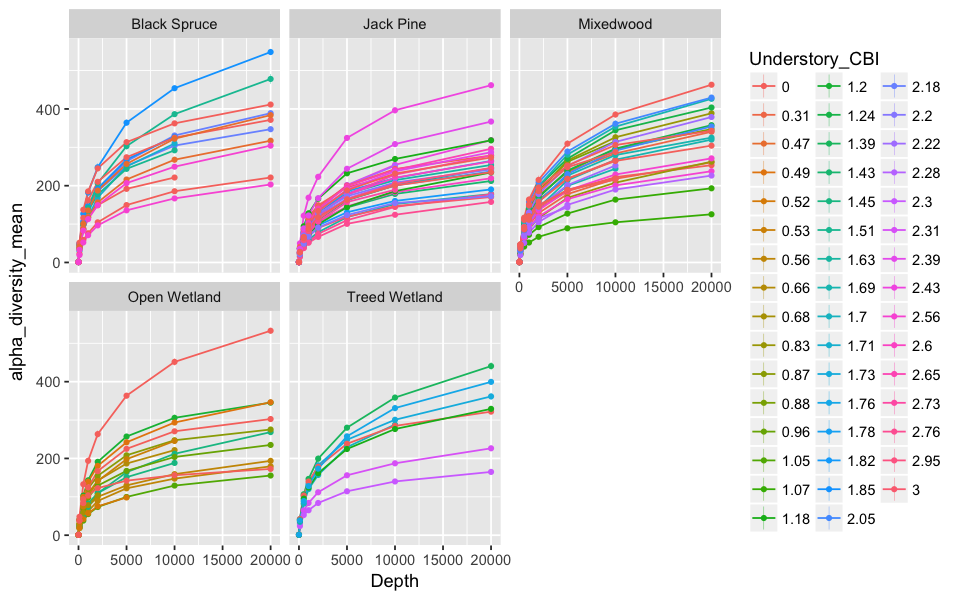

In [38]:
options(repr.plot.width=8, repr.plot.height=5)
ggplot(
  data = rarefaction_curve_data_summary_verbose,
  mapping = aes(
    x = Depth,
    y = alpha_diversity_mean,
    ymin = alpha_diversity_mean - alpha_diversity_sd,
    ymax = alpha_diversity_mean + alpha_diversity_sd,
    colour = Understory_CBI,
    group = Sample
  )
) + geom_line(
#) + scale_colour_manual(values=c("black","darkred")
#) + scale_colour_gradient(low="black",high="red"
) + geom_pointrange(size=0.1
) + facet_wrap(facets = ~ Veg_Comm) + scale_x_continuous(limits = c(0, 20000))

## OTU abundance

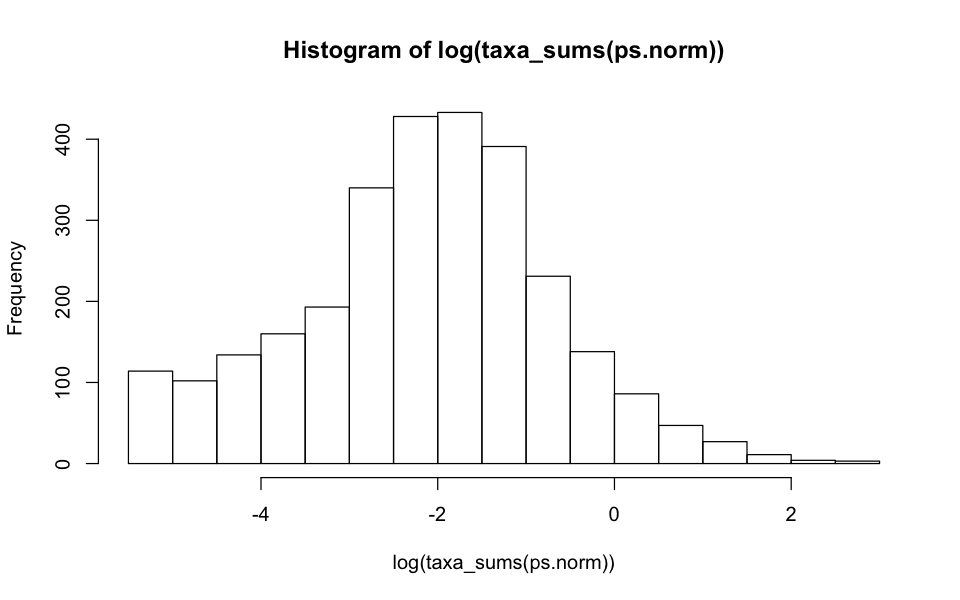

In [39]:
hist(log(taxa_sums(ps.norm)), breaks=20)

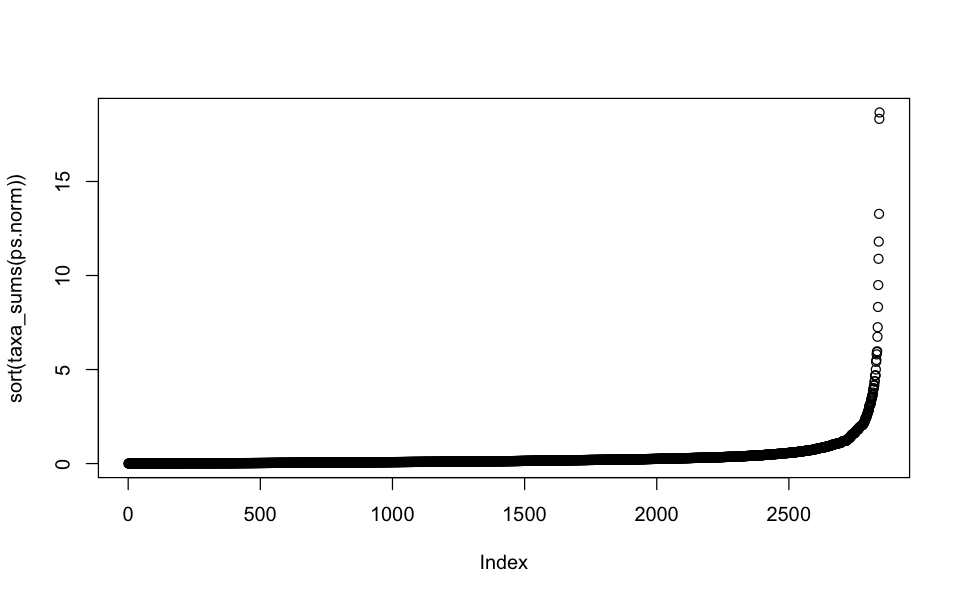

In [40]:
plot(sort(taxa_sums(ps.norm)))

In [36]:
AbundOTUs = row.names(data.frame(sort(taxa_sums(ps.norm))[932:1031]))

In [37]:
mdf=melt(otu_table(ps.norm))
mdf = mdf %>%
    filter(X2 %in% AbundOTUs)%>%
    group_by(X2)%>%
    arrange(-value)
colnames(mdf)=c("Sample_ID","OTU","Abundance")

In [38]:
mdf2=join(mdf,data.frame(sample_data(ps.norm)),by="Sample_ID")

Sample_ID   OTU                              Abundance Al_mg_kg
1 15S-NT-20O  122586d6844f67237ea5cf8da21d9962 0.8997182       NA
2 15S-NT-24O  7e98c055240959ee9ae58d8b56faba92 0.8936581 2967.130
3 15S-NT-22O  7e98c055240959ee9ae58d8b56faba92 0.8838222  833.940
4 15S-NT-28O  7e98c055240959ee9ae58d8b56faba92 0.8571998 3650.970
5 15S-NT-25O  8835787979cd972b2850fe2ea71cbb10 0.8344971  362.463
6 15S-WB-U04M 27d65c36331f1008c621555a5b1f1194 0.8252068    0.000
  Barcodes         Burn_Severity_Index Burned_Unburned CBI  CEC_cmol_kg
1 CGCTATTAAGAGACGT 2.3750              Burned          1.05    NA      
2 TGGAATGCGGCTCGAT 2.1175              Burned          0.21  0.00      
3 GGATAAGAACGCATTC 3.5300              Burned          1.27  0.00      
4 CGTTGAAGCCAAGCTA 4.2750              Burned          2.79  0.00      
5 ACTGCGCGTTCTAAGT 2.2075              Burned          0.66  0.00      
6 GTTGCCAATCTTGAAT 1.0000              Unburned        0.00 12.44      
  CFSI       ⋯ ffmc     fwi      isi       nTrees pH   prec        rh      
1 1.00000000 ⋯ 91.38865 34.47629  9.549220  8       NA 0.000034500 33.72715
2 0.13500000 ⋯ 89.49124 27.64367  9.821614 32     6.75 0.000074000 34.71995
3 0.03888889 ⋯ 91.77077 42.48677 13.064132 32     6.27 0.000138998 35.30830
4 3.64500000 ⋯ 91.75335 42.69650 13.129967 32     7.46 0.000140967 35.54851
5 0.00000000 ⋯ 90.74207 19.77714  7.051965  9     6.48 0.000469702 35.47507
6 0.00000000 ⋯  0.00000  0.00000  0.000000 32     6.98 0.000000000  0.00000
  temp     ws        TotalSeqs
1 28.36350 11.958830 35416    
2 19.13665 17.898012 26031    
3 24.90085 17.102542 24509    
4 24.90136 17.251273 36394    
5 27.62502  7.770202 16129    
6  0.00000  0.000000 17926

In [44]:
mdf2$Severity_Class = ordered(mdf2$Severity_Class, levels=c("Unburned","Low","Moderate","High"))

In [53]:
OTUofInterest=c("4536db4dc3e13401e5aa3a678860efe3","8b1ac4aeab8ebca0ca678f926749e60e","963290b9a284a41714856cb1dca1c940","f02296f6d58f6769a0b6a7989b63109a","e1cad22bcf0ac4e1287e8282c58c44b6")

In [65]:
ps.abundOTUs = prune_taxa( c(OTUofInterest),ps.norm)
tax_table(ps.abundOTUs)

Kingdom Phylum     Class          
4536db4dc3e13401e5aa3a678860efe3 Fungi   Ascomycota Sordariomycetes
f02296f6d58f6769a0b6a7989b63109a Fungi   Ascomycota Eurotiomycetes 
8b1ac4aeab8ebca0ca678f926749e60e Fungi   Ascomycota Dothideomycetes
e1cad22bcf0ac4e1287e8282c58c44b6 Fungi   Ascomycota Dothideomycetes
963290b9a284a41714856cb1dca1c940 Fungi   Ascomycota Sordariomycetes
                                 Order                            
4536db4dc3e13401e5aa3a678860efe3 NA                               
f02296f6d58f6769a0b6a7989b63109a Eurotiomycetes_ord_Incertae_sedis
8b1ac4aeab8ebca0ca678f926749e60e Pleosporales                     
e1cad22bcf0ac4e1287e8282c58c44b6 Pleosporales                     
963290b9a284a41714856cb1dca1c940 Sordariales                      
                                 Family                           
4536db4dc3e13401e5aa3a678860efe3 NA                               
f02296f6d58f6769a0b6a7989b63109a Eurotiomycetes_fam_Incertae_sedis
8b1ac4aeab8ebca0ca678f926749e60e Pleosporales_fam_Incertae_sedis  
e1cad22bcf0ac4e1287e8282c58c44b6 Pleosporales_fam_Incertae_sedis  
963290b9a284a41714856cb1dca1c940 Sordariaceae                     
                                 Genus             Species     
4536db4dc3e13401e5aa3a678860efe3 NA                NA          
f02296f6d58f6769a0b6a7989b63109a Calyptrozyma      unidentified
8b1ac4aeab8ebca0ca678f926749e60e Phoma             unidentified
e1cad22bcf0ac4e1287e8282c58c44b6 Ochrocladosporium NA          
963290b9a284a41714856cb1dca1c940 unidentified      unidentified

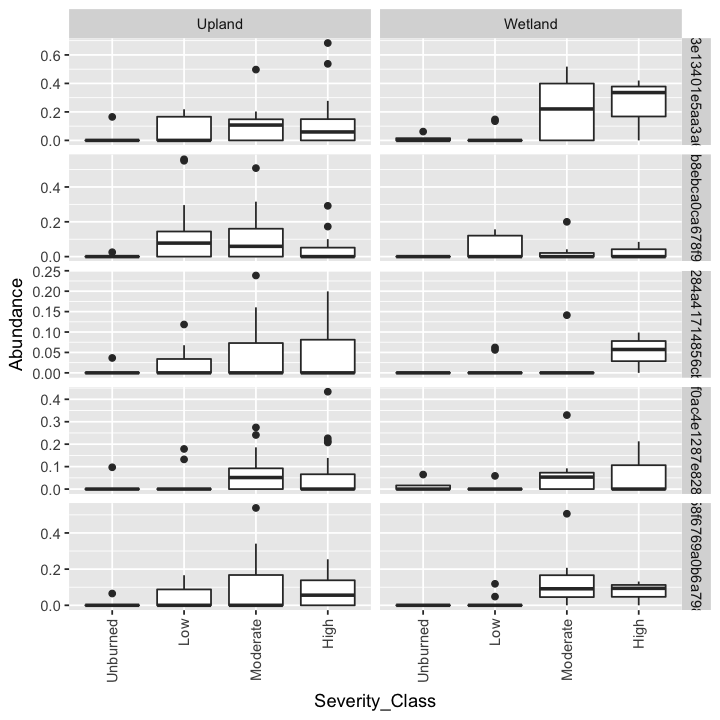

In [58]:
options(repr.plot.width=6, repr.plot.height=6)

mdf3 = mdf2 %>%
    filter(OTU %in% OTUofInterest)

p = ggplot(mdf3,aes(x=Severity_Class, y=Abundance))
p = p + geom_boxplot()
p = p + facet_grid(~OTU~Land_Class, scales="free")
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p

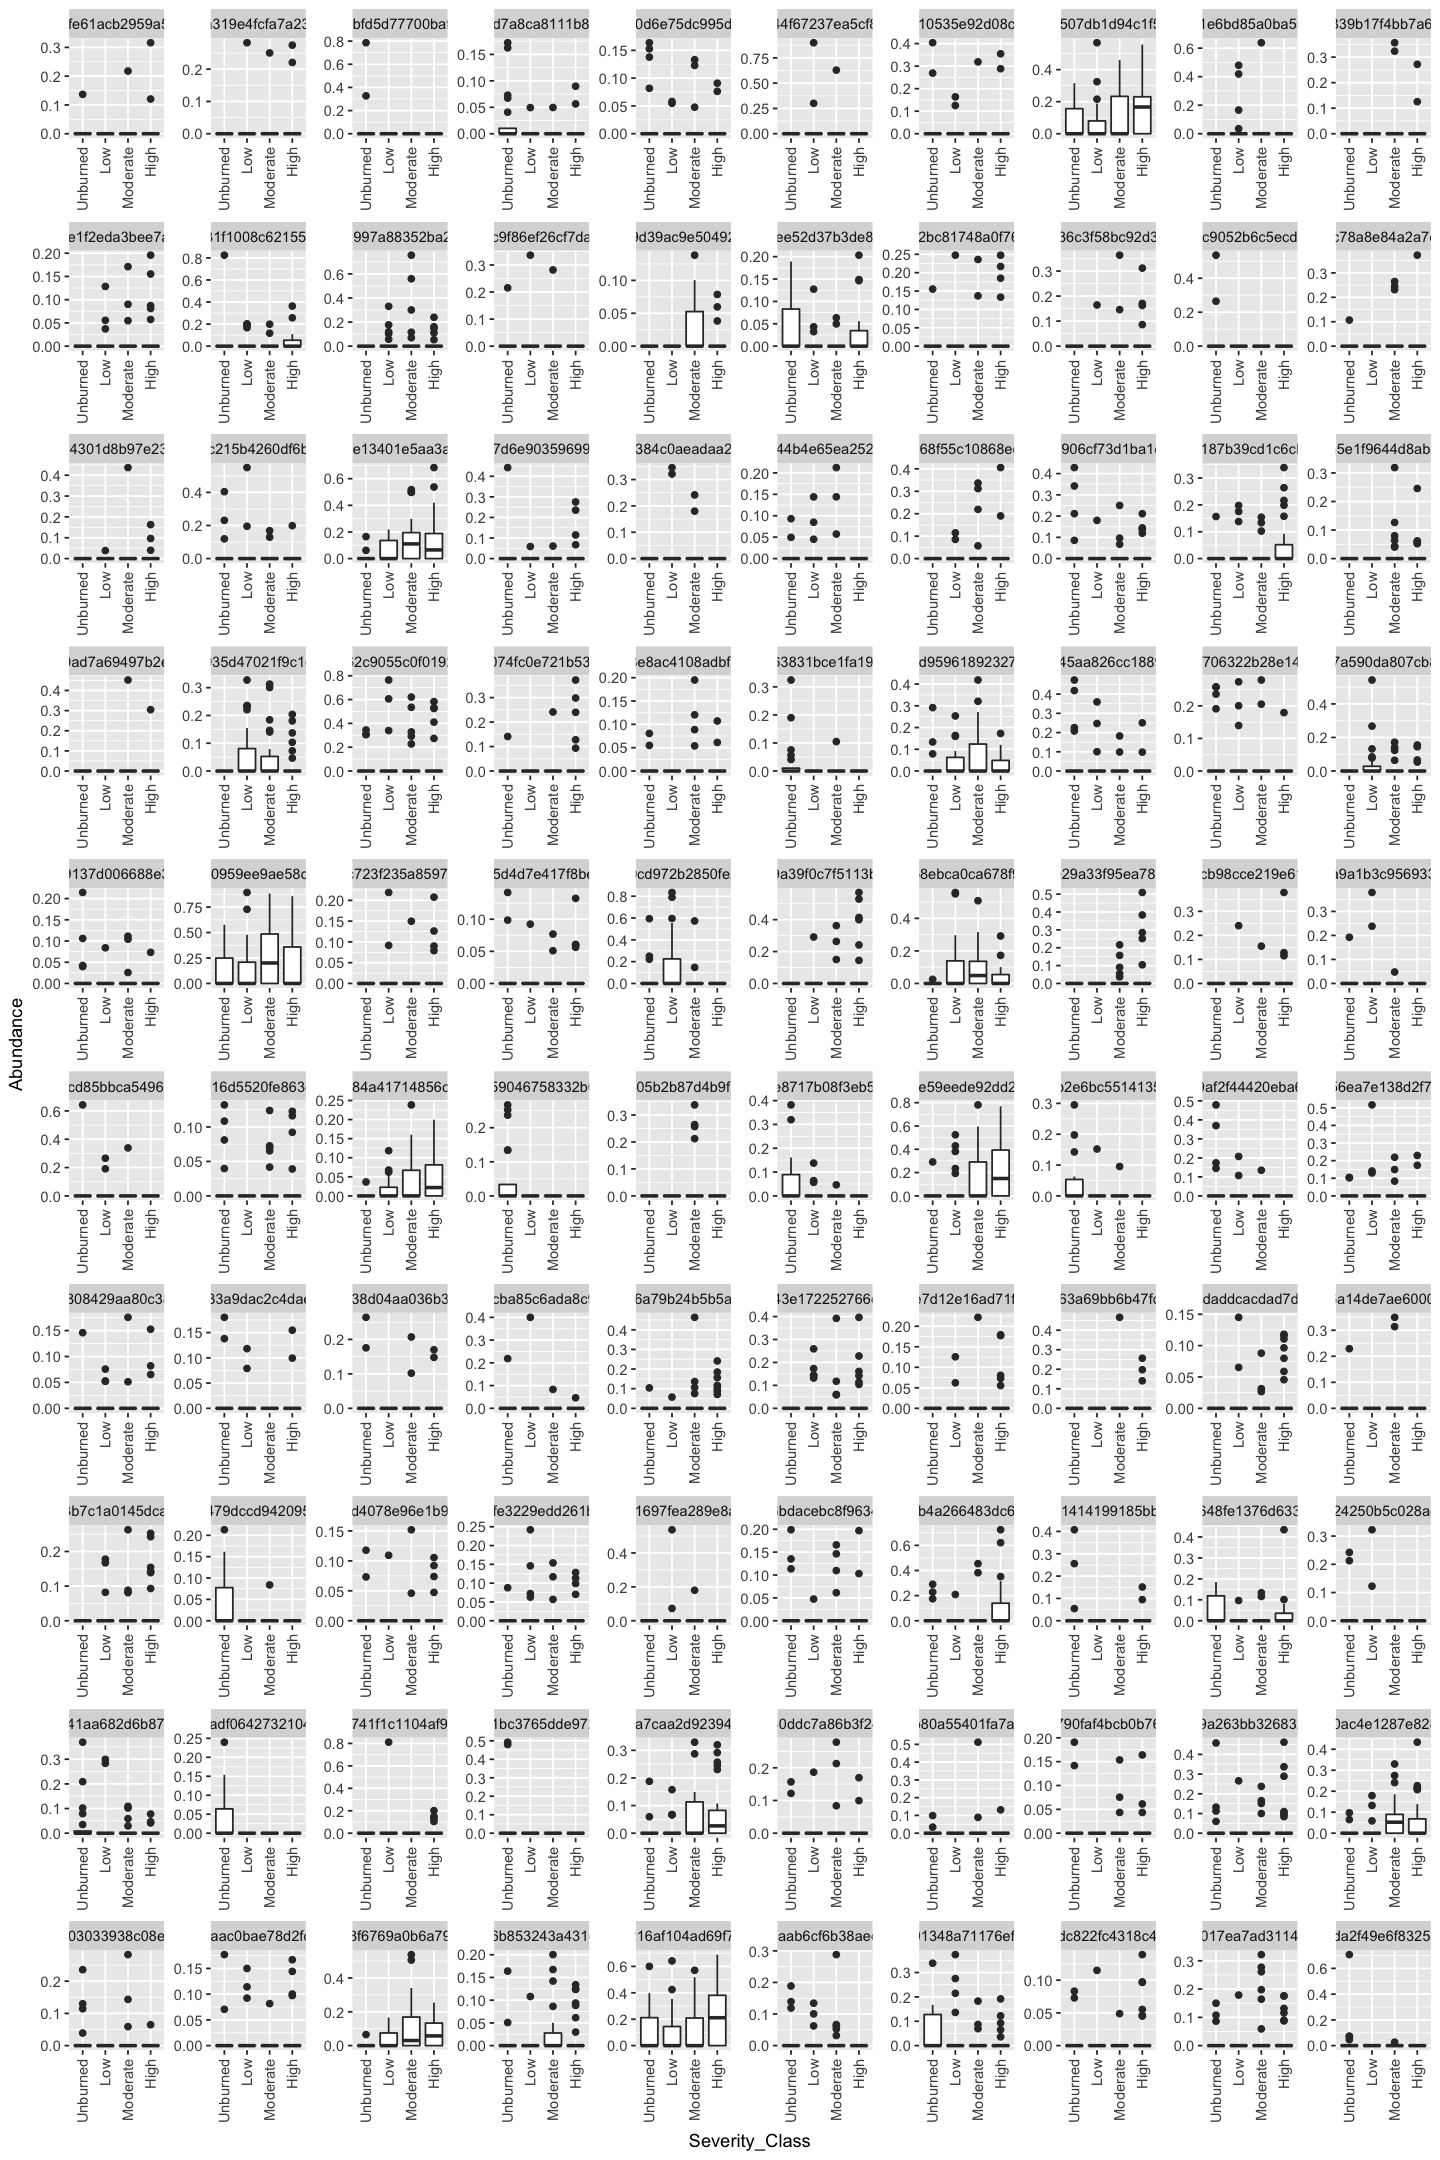

In [45]:
options(repr.plot.width=12, repr.plot.height=18)
p = ggplot(mdf2,aes(x=Severity_Class, y=Abundance))
p = p + geom_boxplot()
p = p + facet_wrap(~OTU, scales="free")
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p

## Stats

Df Sum Sq     Mean Sq     F value  Pr(>F)   
Groups     4 0.01828712 0.004571781 1.133843 0.3453977
Residuals 94 0.37901857 0.004032112       NA        NA

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                                   diff         lwr        upr     p adj
Jack Pine-Black Spruce      0.018771605 -0.03677889 0.07432210 0.8805640
Mixedwood-Black Spruce      0.029641073 -0.02621051 0.08549266 0.5804192
Open Wetland-Black Spruce   0.030905315 -0.03358654 0.09539717 0.6715099
Treed Wetland-Black Spruce -0.011334122 -0.08865714 0.06598889 0.9941000
Mixedwood-Jack Pine         0.010869468 -0.03436390 0.05610284 0.9626877
Open Wetland-Jack Pine      0.012133711 -0.04341678 0.06768420 0.9735823
Treed Wetland-Jack Pine    -0.030105727 -0.10014505 0.03993360 0.7539009
Open Wetland-Mixedwood      0.001264243 -0.05458734 0.05711583 0.9999964
Treed Wetland-Mixedwood    -0.040975194 -0.11125356 0.02930317 0.4874672
Treed Wetland-Open Wetland -0.042239437 -0.11956245 0.03508358 0.5525972


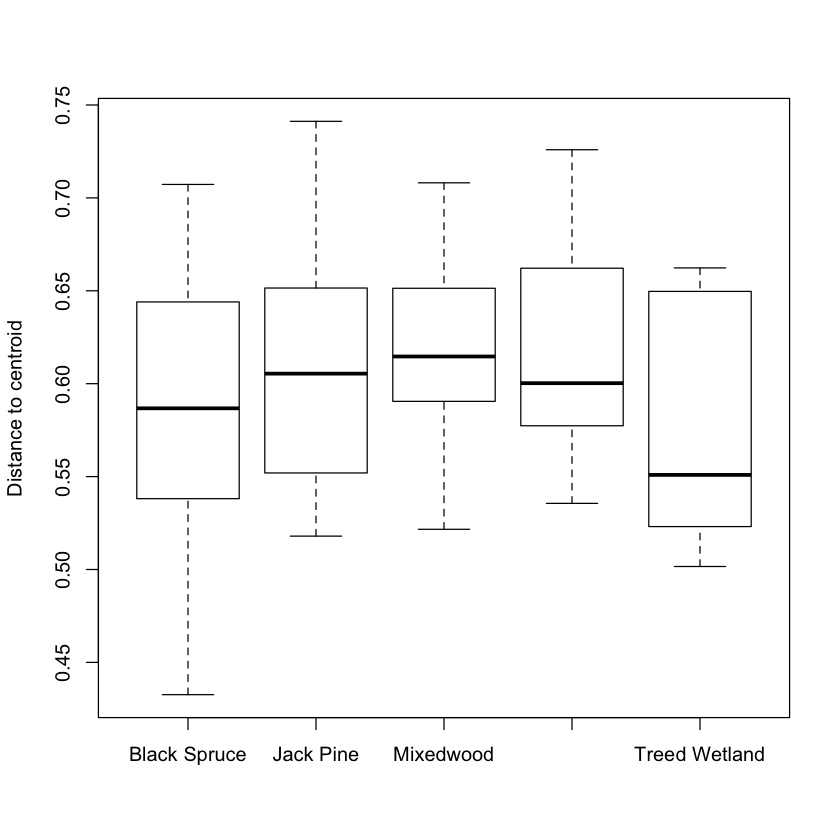

In [10]:
df = as(sample_data(ps.norm), "data.frame")
d = distance(ps.norm, method = "bray")
sampdat = sample_data(ps.norm)
groups = as.factor(sampdat$Veg_Comm)
x = betadisper(d, groups)
boxplot(x, ylab = "Distance to centroid")
anova(x)
TukeyHSD(x, ordered = FALSE, conf.level = 0.95)
# Performing test of beta dispersion - the permanova/adonis test requires that groups have similar dispersion.
# This doesn't look outrageously bad here for Org_or_Min, Veg_Comm, Land_Class, Burned_Unburned

In [125]:
AdonisFunction = function(physeq=ps.norm, method="bray", Org_or_Min=c("O","M"), Land_Class=c("Upland","Wetland"),
                          Burned_Unburned=c("Burned","Unburned")){
    #physeq = prune_samples(sample_data(physeq)$Burned_Unburned %in% Burned_Unburned, physeq)
    physeq = prune_samples(sample_data(physeq)$Org_or_Min %in% Org_or_Min, physeq)
    physeq = prune_samples(sample_data(physeq)$Land_Class %in% Land_Class, physeq)
    physeq = prune_samples(!is.na(sample_data(physeq)$pH), physeq)
    #physeq = prune_samples(!is.na(sample_data(physeq)$CFSI), physeq)
    #physeq = prune_samples(!is.na(sample_data(physeq)$TOC_LOI_pct), physeq)    
    d = distance(physeq, method = method, weighted=TRUE)  
    d.adonis = adonis(d ~ 
                      + sample_data(physeq)$Veg_Comm  
                      #+ sample_data(physeq)$Org_or_Min 
                      #+ sample_data(physeq)$Land_Class
                      #+ sample_data(physeq)$Sand_pct 
                      + sample_data(physeq)$pH
                      #+ sample_data(physeq)$Total_S_pct
                      #+ sample_data(physeq)$Al_mg_kg
                      #+ sample_data(physeq)$Exch_Ca_mg_kg
                      #+ sample_data(physeq)$Fire_ID
                      #+ sample_data(physeq)$CEC_cmol_kg
                      #+ sample_data(physeq)$TOC_LOI_pct
                      #+ sample_data(physeq)$ffmc
                      #+ sample_data(physeq)$Pct_Exposed_Mineral
                      #+ sample_data(physeq)$P_mg_kg
                      #+ sample_data(physeq)$Total_N_pct
                      #+ sample_data(physeq)$Interval
                      #+ sample_data(physeq)$CFSI
                      #+ sample_data(physeq)$CBI
                      #+ sample_data(physeq)$Understory_CBI
                      #+ sample_data(physeq)$fwi
                      #+ sample_data(physeq)$Burn_Severity_Index
                      #+ sample_data(physeq)$RBR
                      + sample_data(physeq)$Burned_Unburned
                      * sample_data(physeq)$Veg_Comm
                      * sample_data(physeq)$pH
                      #* sample_data(physeq)$Org_or_Min
                      , df)
    d.adonis
}
# Try removing unburned sites from these models|

In [126]:
a = AdonisFunction(physeq=ps.norm, Org_or_Min=c("M"), Land_Class=c("Upland"), Burned_Unburned=c("Unburned","Burned"))
1-a$aov.tab["Residuals","R2"]

[1] 0.3539639

## Holden plots

In [329]:
d = psmelt(ps.norm)

In [330]:
df = d %>%
    group_by(Land_Class,Org_or_Min,Family,CBI,RBR,Burn_Severity_Index,OTU)%>%
    summarize(TaxPresent = ifelse(sum(Abundance)>0,1,0))%>%
    filter(TaxPresent>0)%>%
    group_by(Land_Class,Org_or_Min,Family)%>%
    summarize(MeanCBI=mean(CBI),MeanRBR=mean(RBR),MeanBSI=mean(Burn_Severity_Index),n=n())

In [331]:
df = d %>%
    group_by(Land_Class,Org_or_Min,Family,OTU,CBI,RBR,Burn_Severity_Index)%>%
    summarize(TaxPresent = ifelse(sum(Abundance)>0,1,0))%>%
    filter(TaxPresent>0)%>%
    group_by(Land_Class,Org_or_Min,Family,OTU)%>%
    summarize(MeanCBI=mean(CBI),MeanRBR=mean(RBR),MeanBSI=mean(Burn_Severity_Index))%>%
    group_by(Land_Class,Org_or_Min,Family)%>%
    mutate(nTax = n())

In [332]:
Order = df %>%
    group_by(Family)%>%
    summarize(Order=mean(MeanRBR))%>%
    arrange(-Order)

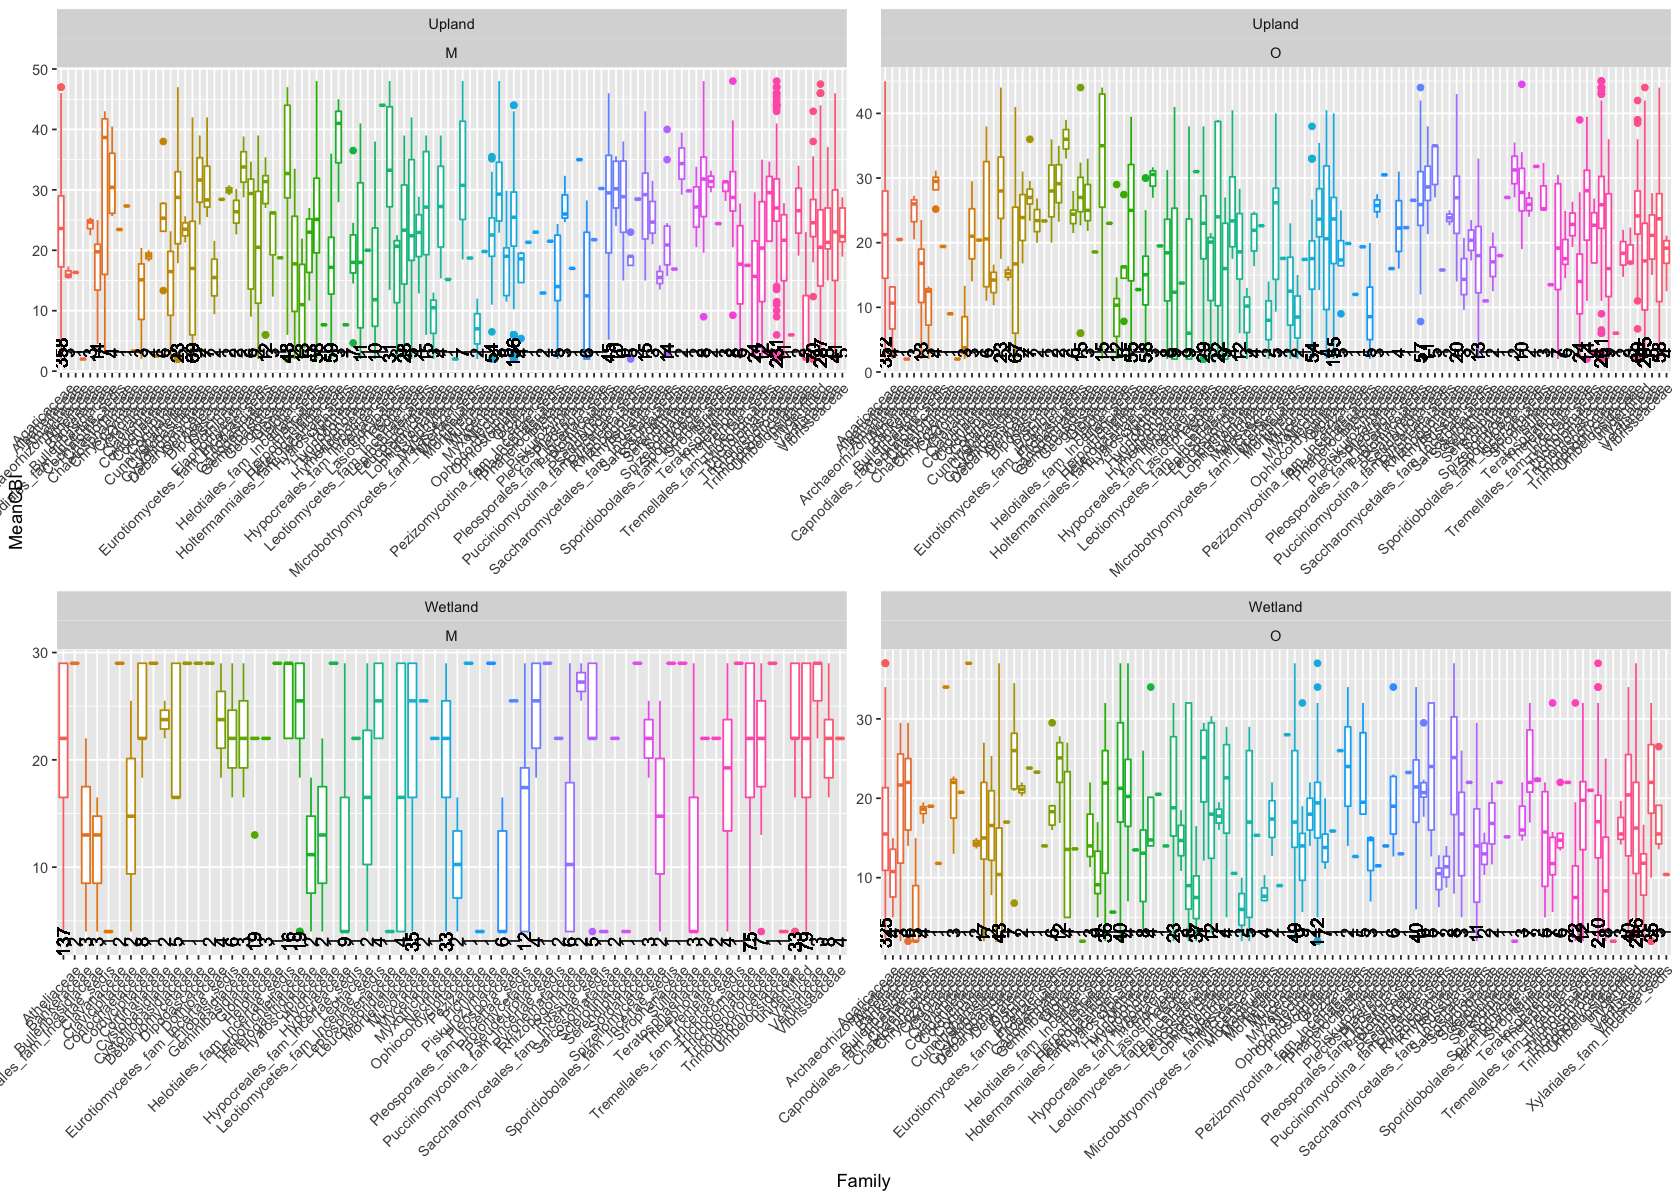

In [333]:
options(repr.plot.width=14, repr.plot.height=10)

df$Class = ordered(df$Family, levels=paste(Order$Family))

p = ggplot(df, aes(x=Family, colour=Family)) + geom_boxplot(aes(y=MeanCBI)) 
p = p + facet_wrap(~Land_Class*Org_or_Min, scales="free")
p = p + theme(axis.text.x = element_text(angle=45,hjust=1))
p = p + guides(colour=FALSE)
p = p + geom_text(aes(label=paste("",nTax, sep=""), y = 3.1, angle=90), colour="black")
p = p + theme()
p
# Need to think about exactly what we want to calculate here...

## Alpha diversity vs. Return Interval

In [967]:
# Create a factor corresponding to the Genera
genfac = factor(tax_table(ps.norm)[, "Genus"])

# Tabulate the counts for each genera in each sample
gentab = apply(otu_table(ps.norm), MARGIN = 1, function(x) {tapply(x, INDEX = genfac, FUN = sum, na.rm = TRUE, simplify = TRUE)})

observationThreshold = 0
GenSum = apply(gentab > observationThreshold, 2, sum)
OTUSum = apply(otu_table(ps.norm) > observationThreshold, 1, sum)
max(GenSum)
# The number of OTUs or genera in each sample

[1] 22

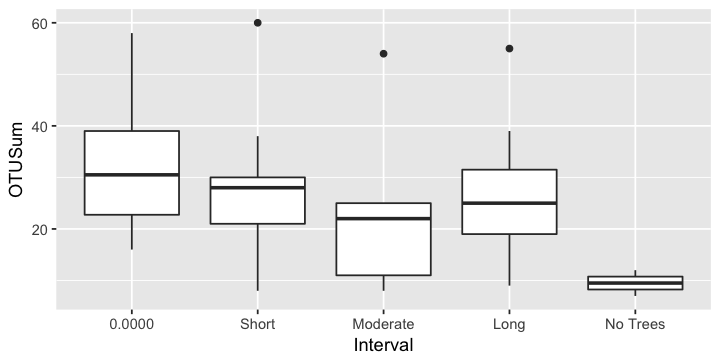

In [971]:
df = data.frame(sample_data(ps.norm))
df$OTUSum = OTUSum
df$GenSum = GenSum
df$Interval = ordered(df$Interval, levels = c("0.0000", "Short", "Moderate","Long","No Trees"))
#df$Interval[df$Interval=="No Trees"]=NA
#df$Interval[df$Interval=="0.0000"]=NA
p = ggplot(df, aes(x=Interval, y=OTUSum))
p = p + geom_boxplot()
#p = p + facet_grid(~Veg_Comm)
p

In [953]:
OTU.aov = aov(data=df,OTUSum~Interval)
summary(OTU.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
Interval     2    177   88.45   0.816  0.446
Residuals   74   8019  108.36               
22 observations deleted due to missingness

In [950]:
#library(agricolae)

In [951]:
TukeyHSD(OTU.aov,"Interval")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = OTUSum ~ Interval, data = df)

$Interval
                     diff        lwr       upr     p adj
Short-0.0000    -4.247059 -13.539194  5.045076 0.6310866
Moderate-0.0000 -9.711111 -21.017316  1.595094 0.1183402
Long-0.0000     -6.403922 -13.835537  1.027693 0.1164864
Moderate-Short  -5.464052 -17.075733  6.147628 0.6088397
Long-Short      -2.156863 -10.045446  5.731721 0.8907975
Long-Moderate    3.307190  -6.876928 13.491307 0.8305492


In [919]:
anova(OTU.aov)

Df Sum Sq    Mean Sq  F value  Pr(>F)    
Interval   4  1382.071 345.5178 3.008926 0.02200349
Residuals 94 10794.110 114.8310       NA         NA

## Trying alpha div with Breakaway

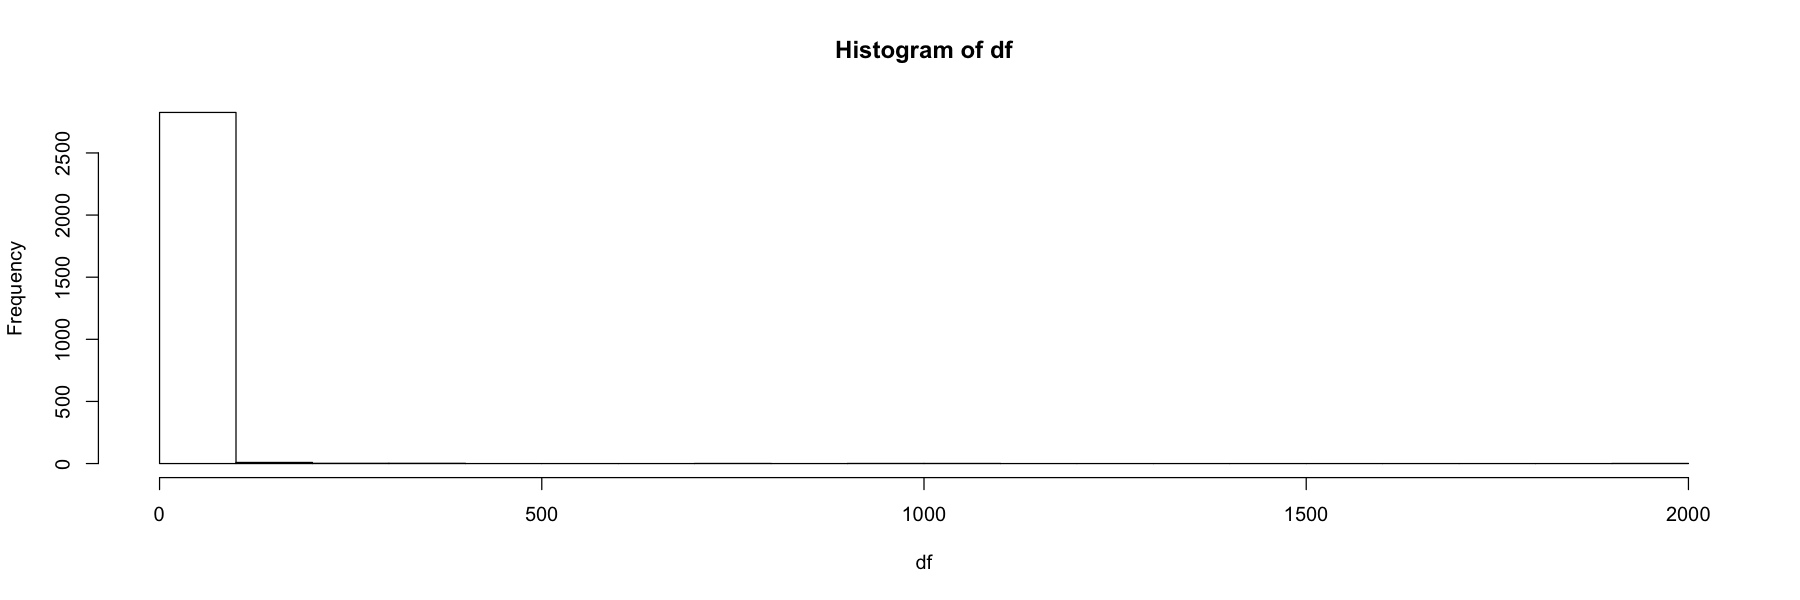

In [54]:
MINFUNC=function(x){
    min(x[x>0])
}
# A function to get the minimum non-zero OTU abundance
df = apply(otu_table(ps),FUN=MINFUNC,MARGIN=1)
# Getting it for each sample
hist(df,breaks=20)
# The least abundant minimum OTU is still 4 counts

In [56]:
FreqTableGenerator = function(Sample){
    df = data.frame(t(otu_table(ps))[,Sample])
    # Grab the OTU table
    colnames(df)="Frequency"
    # Add a column for the frequencies of the OTUs
    df = df %>%
        group_by(Frequency)%>%
        summarize(nOTUs=n())%>%
        arrange(Frequency)
    # Summarize the total OTUs that are present at each frequency
    df = df[df$Frequency>1,]
    # Cut out the 0 and 1 frequencies (because dada2 trimmed singletons)
    colnames(df)=NULL
    # Omit column names
    df = as.matrix(df)
    # Spit out a nice matrix
    df
}
# Generates the frequency table summary needed by breakaway

In [58]:
Samples = sample_names(ps)

In [60]:
FreqTableGenerator(Samples[1])

ERROR: Error in as(x, "matrix")[i, j, drop = FALSE]: subscript out of bounds


In [63]:
report = data.frame(name="",Richness_estimate="",Richness_stderr="",Richness_model="")
breakawayrunner = function(SampleName){
    df = FreqTableGenerator(SampleName)
    #print(head(df))
    #print(SampleName)
    #print(sum(df[,1]*df[,2]))
    if(df[1,1]==2 & (sum(df[1:6,1])==sum(c(2:7)))){
        # First, check that the first frequency count is, indeed, 2,
        # and there are at least 6 consecutive counts (could actually just do this test)
            m = breakaway_nof1(df, answers=TRUE, plot=FALSE, print=FALSE)
        # Run breakaway for the no singletons data
            Richness_model = m$name
            Richness_estimate = m$est
            Richness_stderr = m$seest
            name = SampleName
        # Grab the outputs
            report = data.frame(name,Richness_estimate,Richness_stderr,Richness_model)
        # Generate a report
    } else {
        name = SampleName
        report=data.frame(name)
        # If breakaway isn't going to work anyway, just spit out the name (and NAs)
        }

    report

}

In [62]:
Reports = mdply(Samples,breakawayrunner)
head(Reports)

# No samples have a leading doubleton count (or singleton count), so this doesn't work
# Could think about using more conservative OTU generation (dada2 increase maxee?)

ERROR: Error in as(x, "matrix")[i, j, drop = FALSE]: subscript out of bounds


In [976]:
Report_Summary = Reports %>%
    group_by(Richness_model)%>%
    summarize(n())
Report_Summary
# How many of each sample fit each model type

ERROR: Error in eval(expr, envir, enclos): unknown variable to group by : Richness_model
